In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

In [2]:
data2022 =pd.read_csv("valeursfoncieres-2022.txt", sep="|", encoding='utf-8')
data2022.head()

C:\Users\calur\AppData\Local\Temp\ipykernel_8704\3345518066.py:1: DtypeWarning: Columns (18,23,24,26,28,29,31,33) have mixed types. Specify dtype option on import or set low_memory=False.
  data2022 =pd.read_csv("valeursfoncieres-2022.txt", sep="|", encoding='utf-8')


,Identifiant de document,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,NaN,1.0,2.0,Appartement,NaN,24.0,1.0,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,S,NaN,84.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,S,NaN,88.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,NaN,1.0,2.0,Appartement,NaN,140.0,3.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2022,Vente,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,T,NaN,510.0


In [3]:
data2022.isnull().sum()/len(data2022)*100

Identifiant de document       100.000000
Reference document            100.000000
1 Articles CGI                100.000000
2 Articles CGI                100.000000
3 Articles CGI                100.000000
4 Articles CGI                100.000000
5 Articles CGI                100.000000
No disposition                  0.000000
Date mutation                   0.000000
Nature mutation                 0.000025
Valeur fonciere                 0.672942
No voie                        38.175477
B/T/Q                          95.542564
Type de voie                   41.095343
Code voie                       0.791801
Voie                            0.795306
Code postal                     0.796275
Commune                         0.000025
Code departement                0.000025
Code commune                    0.000025
Prefixe de section             94.753994
Section                         0.003902
No plan                         0.000025
No Volume                      99.799813
1er lot         

In [4]:
data2022=data2022.drop(['Identifiant de document','Reference document','1 Articles CGI','2 Articles CGI','3 Articles CGI','4 Articles CGI','No voie', 'B/T/Q','Type de voie', 'Code voie', 'Voie','Prefixe de section',
       'Section', 'No plan', 'No Volume', '1er lot','5 Articles CGI',
       'Surface Carrez du 1er lot', '2eme lot', 'Surface Carrez du 2eme lot',
       '3eme lot', 'Surface Carrez du 3eme lot', '4eme lot',
       'Surface Carrez du 4eme lot', '5eme lot', 'Surface Carrez du 5eme lot',
       'Nombre de lots', 'Code type local','Nature culture speciale', 'Identifiant local', 'Nature culture'],axis=1)

In [5]:
data2022 = data2022.dropna(subset=['Valeur fonciere'])
data2022 = data2022.dropna(subset=['Code postal'])
data2022 = data2022.dropna(subset=['Surface terrain'])
data2022 = data2022.dropna(subset=['Type local'])
data2022 = data2022.dropna(subset=['Surface reelle bati'])
data2022 = data2022.dropna(subset=['Nombre pieces principales'])

In [6]:
len(data2022)

1328978

In [7]:
data2022.isnull().sum()/len(data2022)*100

No disposition               0.0
Date mutation                0.0
Nature mutation              0.0
Valeur fonciere              0.0
Code postal                  0.0
Commune                      0.0
Code departement             0.0
Code commune                 0.0
Type local                   0.0
Surface reelle bati          0.0
Nombre pieces principales    0.0
Surface terrain              0.0
dtype: float64

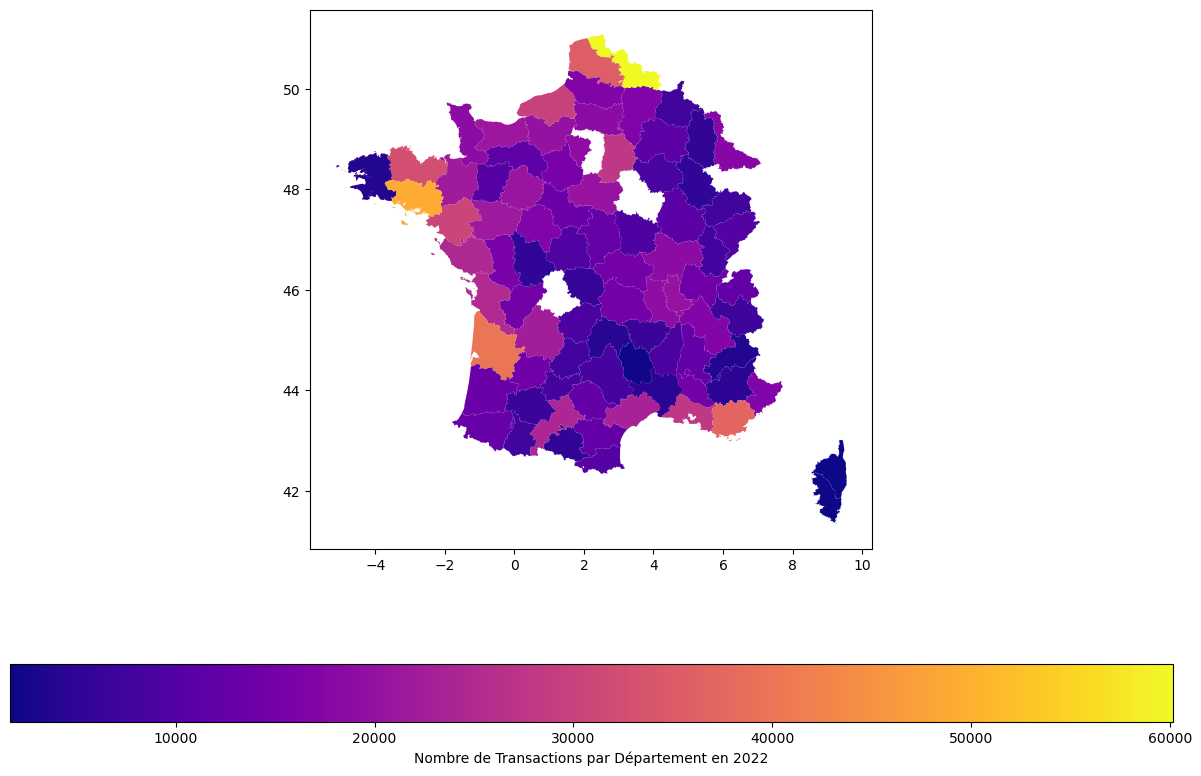

In [8]:
dep_transac2022 = gpd.read_file('https://www.data.gouv.fr/fr/datasets/r/90b9341a-e1f7-4d75-a73c-bbc010c7feeb')# fichier GeoJSON contenant
dep_transac2022=dep_transac2022.replace("2A","201")
dep_transac2022=dep_transac2022.replace("2B","202")
dep_transac2022['code'] = dep_transac2022['code'].astype(int)
transac_dep2022=data2022.groupby("Code departement")["Code departement"].count().reset_index(name='Nombre de transactions')
transac_dep2022=transac_dep2022.replace("2A","201")
transac_dep2022=transac_dep2022.replace("2B","202")
transac_dep2022['Code departement'] = transac_dep2022['Code departement'].astype(int)
dep_transac2022 = dep_transac2022.merge(transac_dep2022, left_on='code', right_on='Code departement')
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
dep_transac2022.plot(column='Nombre de transactions', ax=ax, legend=True, cmap='plasma',
                 legend_kwds={'label': "Nombre de Transactions par Département en 2022",
                              'orientation': "horizontal"})
plt.show()

In [9]:
data2022['Date mutation'] = pd.to_datetime(data2022['Date mutation'], format='%d/%m/%Y')

In [10]:
data2022['Mois'] = data2022['Date mutation'].dt.to_period('M')

In [11]:
transactions_mensuelle_2022 = data2022.groupby('Mois').size()

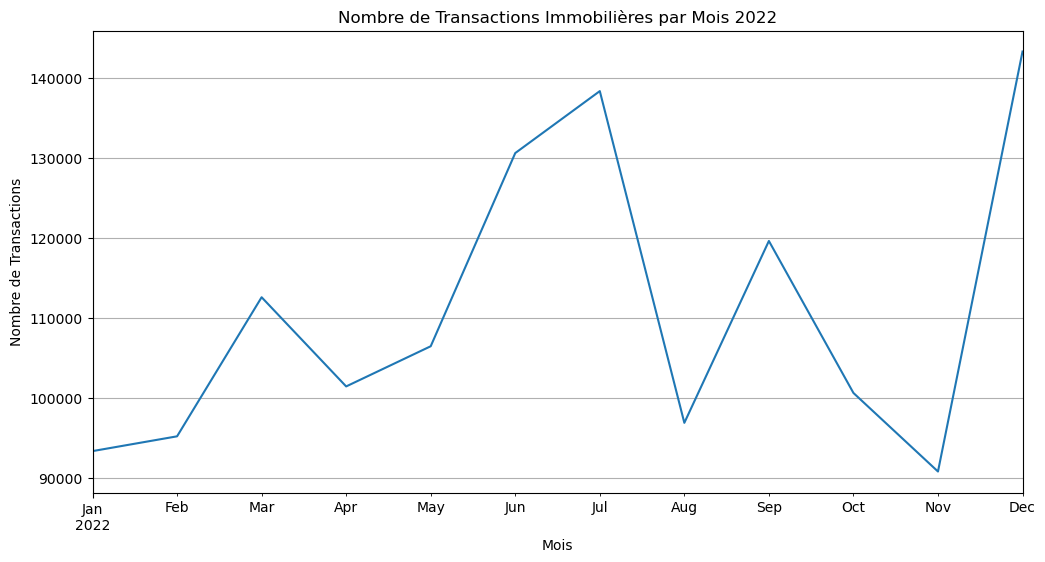

In [12]:
transactions_mensuelle_2022.plot(kind='line', figsize=(12, 6))
plt.title('Nombre de Transactions Immobilières par Mois 2022')
plt.xlabel('Mois')
plt.ylabel('Nombre de Transactions')
plt.grid(True)
plt.show()

In [13]:
data2022['Valeur fonciere'] = data2022['Valeur fonciere'].replace(',', '.', regex=True).astype(float)
valeur_fonciere_moyenne_par_mois = data2022.groupby('Mois')['Valeur fonciere'].mean().reset_index()
valeur_fonciere_moyenne_par_mois.columns = ['Date', 'Valeur Fonciere Moyenne']
print(valeur_fonciere_moyenne_par_mois)

       Date  Valeur Fonciere Moyenne
0   2022-01             5.889057e+05
1   2022-02             4.208557e+05
2   2022-03             3.873881e+05
3   2022-04             3.830316e+05
4   2022-05             3.733147e+05
5   2022-06             3.694870e+06
6   2022-07             4.599329e+05
7   2022-08             3.666176e+05
8   2022-09             6.718963e+05
9   2022-10             4.192446e+05
10  2022-11             4.759414e+05
11  2022-12             6.126790e+07


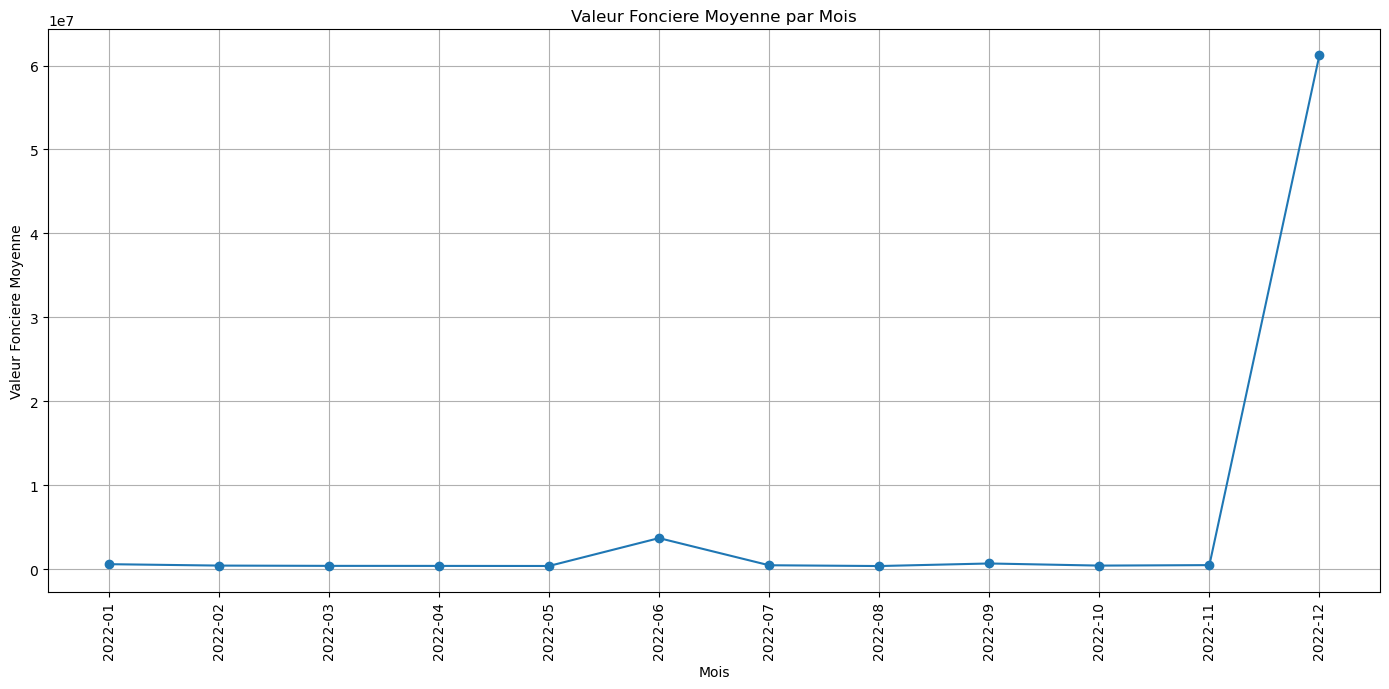

In [14]:
plt.figure(figsize=(14, 7))
plt.plot(valeur_fonciere_moyenne_par_mois['Date'].astype(str), valeur_fonciere_moyenne_par_mois['Valeur Fonciere Moyenne'], marker='o')
plt.xticks(rotation=90)
plt.xlabel('Mois')
plt.ylabel('Valeur Fonciere Moyenne')
plt.title('Valeur Fonciere Moyenne par Mois')
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
transactionTopFive2022=data2022.groupby("Code departement")["Code departement"].count().sort_values(ascending=False)
transac2022=transactionTopFive2022[0:5]


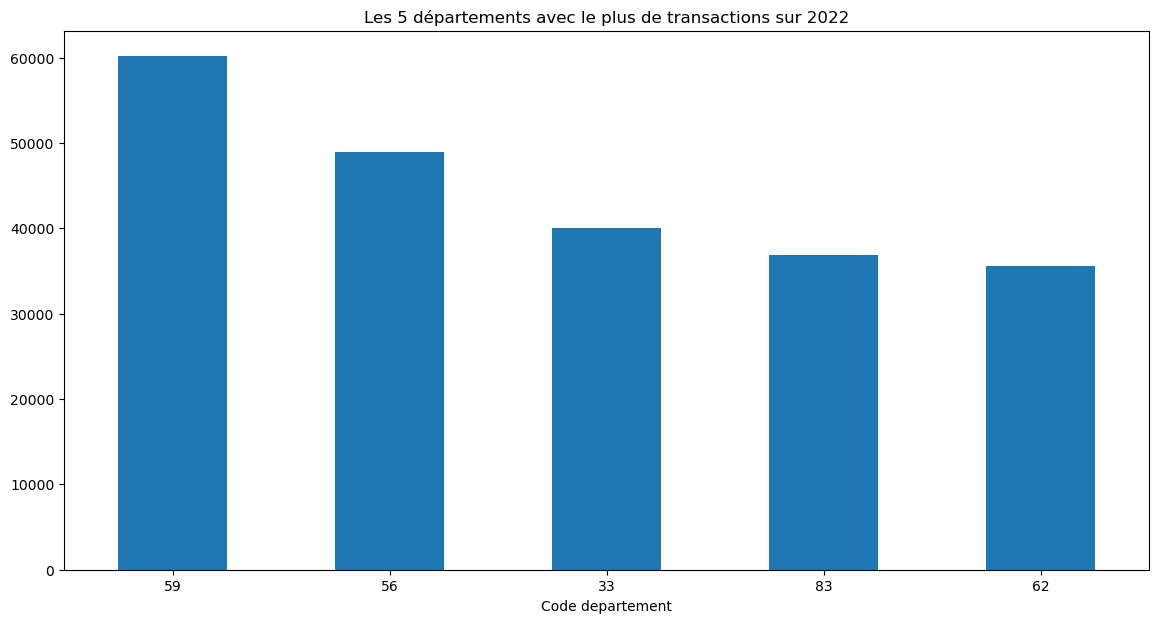

In [16]:
transac2022.plot(kind='bar',rot=0,figsize=(14,7))
plt.title("Les 5 départements avec le plus de transactions sur 2022")
plt.show()

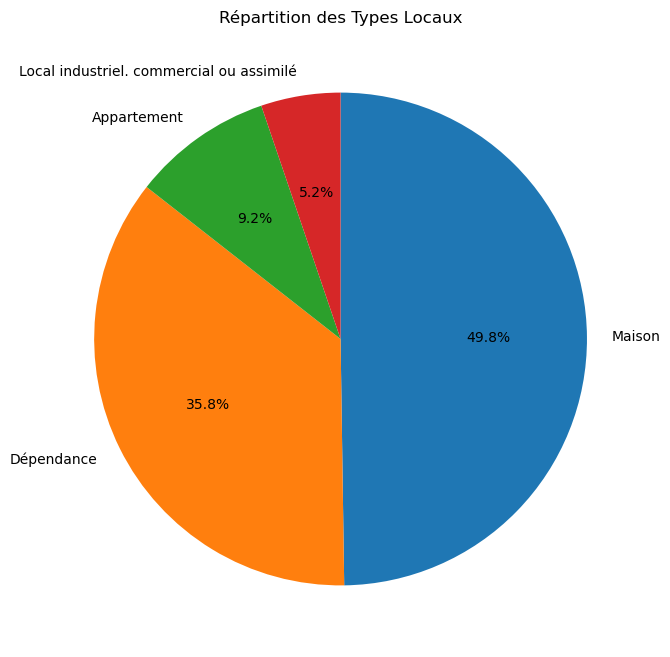

In [17]:
type_local_counts_filtered = data2022['Type local'].value_counts()

plt.figure(figsize=(8, 8))
type_local_counts_filtered.plot(kind='pie', autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Répartition des Types Locaux')
plt.ylabel('')  
plt.show()

In [18]:
dept_59_data = data2022[data2022['Code departement'] == 59]
type_local_counts_filtered2 = dept_59_data['Type local'].value_counts()



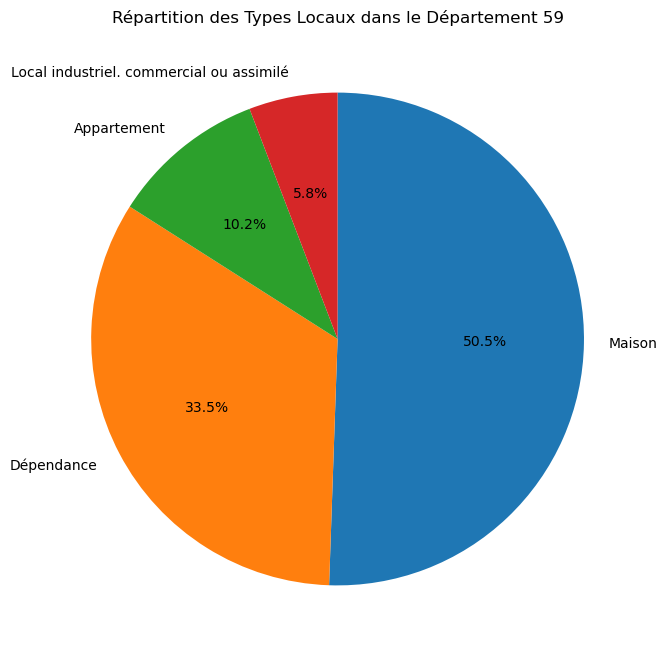

In [19]:
plt.figure(figsize=(8, 8))
type_local_counts_filtered2.plot(kind='pie', autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Répartition des Types Locaux dans le Département 59')
plt.ylabel('')  
plt.show()

In [20]:
data2022['Nombre pieces principales'] = data2022['Nombre pieces principales'].replace(',', '.', regex=True).astype(float)
nb_piece_par_mois2022 = data2022.groupby('Mois')['Nombre pieces principales'].mean().reset_index()
nb_piece_par_mois2022.columns = ['Mois', 'Nombre pieces principales']
print(nb_piece_par_mois2022)

       Mois  Nombre pieces principales
0   2022-01                   2.346501
1   2022-02                   2.333232
2   2022-03                   2.311669
3   2022-04                   2.331674
4   2022-05                   2.336856
5   2022-06                   2.328894
6   2022-07                   2.417723
7   2022-08                   2.462846
8   2022-09                   2.347180
9   2022-10                   2.340715
10  2022-11                   2.286152
11  2022-12                   2.113371


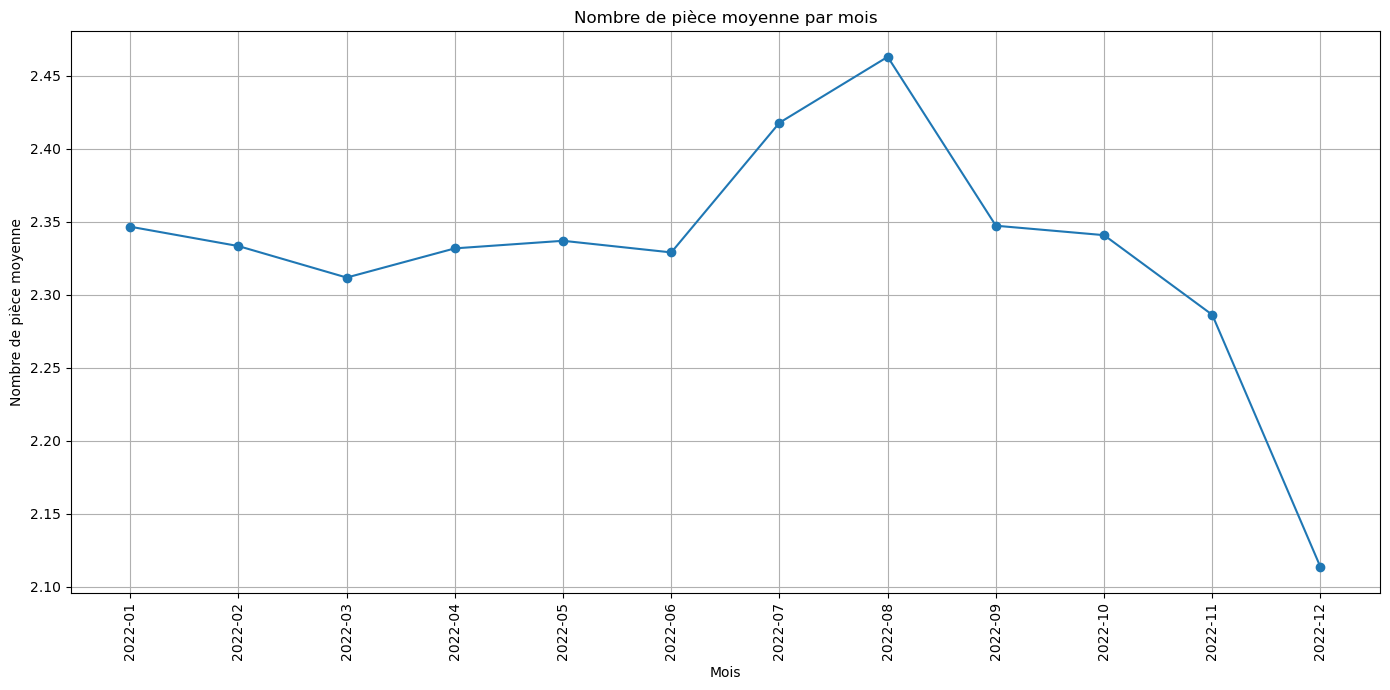

In [21]:
plt.figure(figsize=(14, 7))
plt.plot(nb_piece_par_mois2022['Mois'].astype(str), nb_piece_par_mois2022['Nombre pieces principales'], marker='o')
plt.xticks(rotation=90)
plt.xlabel('Mois')
plt.ylabel('Nombre de pièce moyenne')
plt.title('Nombre de pièce moyenne par mois')
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
data2022['Surface reelle bati'] = data2022['Surface reelle bati'].replace(',', '.', regex=True).astype(float)
Surfacereellebati_par_mois = data2022.groupby('Mois')['Surface reelle bati'].mean().reset_index()
Surfacereellebati_par_mois.columns = ['Mois', 'Surface reelle bati']
print(Surfacereellebati_par_mois)

       Mois  Surface reelle bati
0   2022-01            96.418059
1   2022-02            91.689010
2   2022-03            93.213343
3   2022-04           101.518621
4   2022-05            98.093921
5   2022-06            92.173369
6   2022-07            94.122717
7   2022-08            82.114620
8   2022-09            93.105420
9   2022-10           101.056032
10  2022-11            92.358510
11  2022-12            92.887229


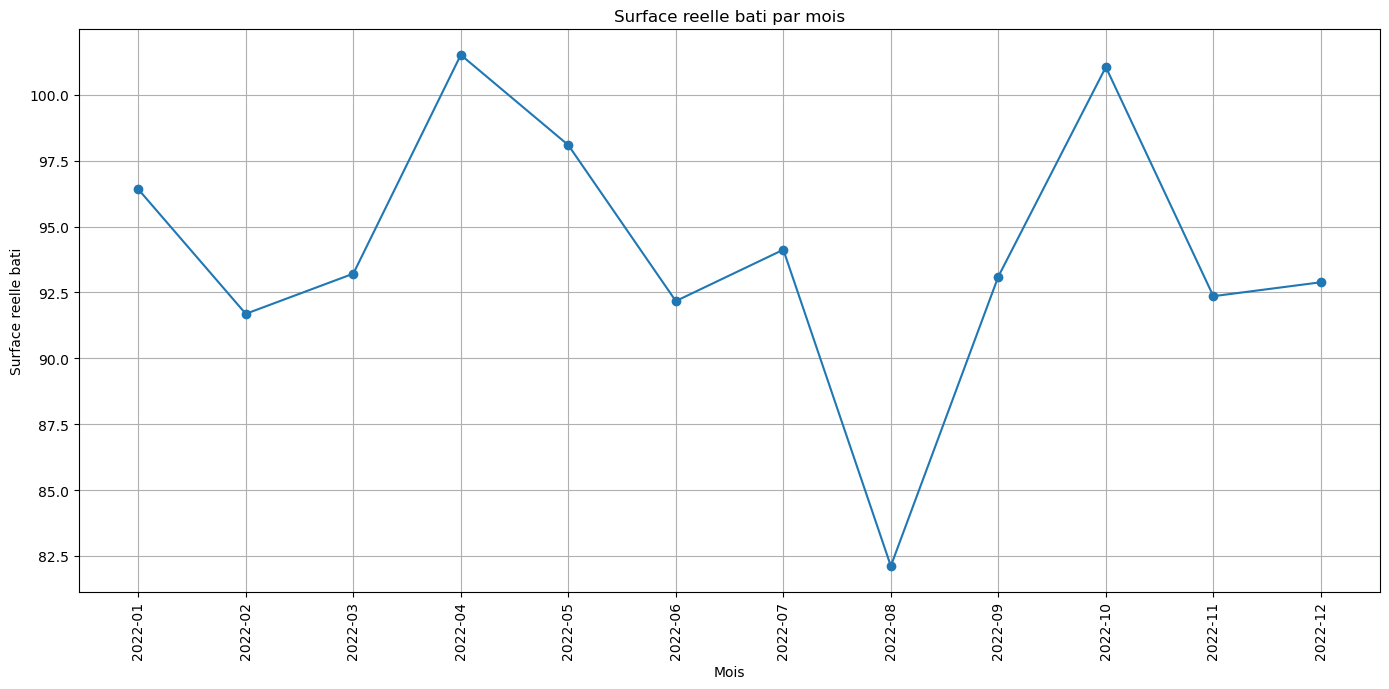

In [23]:
plt.figure(figsize=(14, 7))
plt.plot(Surfacereellebati_par_mois['Mois'].astype(str), Surfacereellebati_par_mois['Surface reelle bati'], marker='o')
plt.xticks(rotation=90)
plt.xlabel('Mois')
plt.ylabel('Surface reelle bati')
plt.title('Surface reelle bati par mois')
plt.grid(True)
plt.tight_layout()
plt.show()

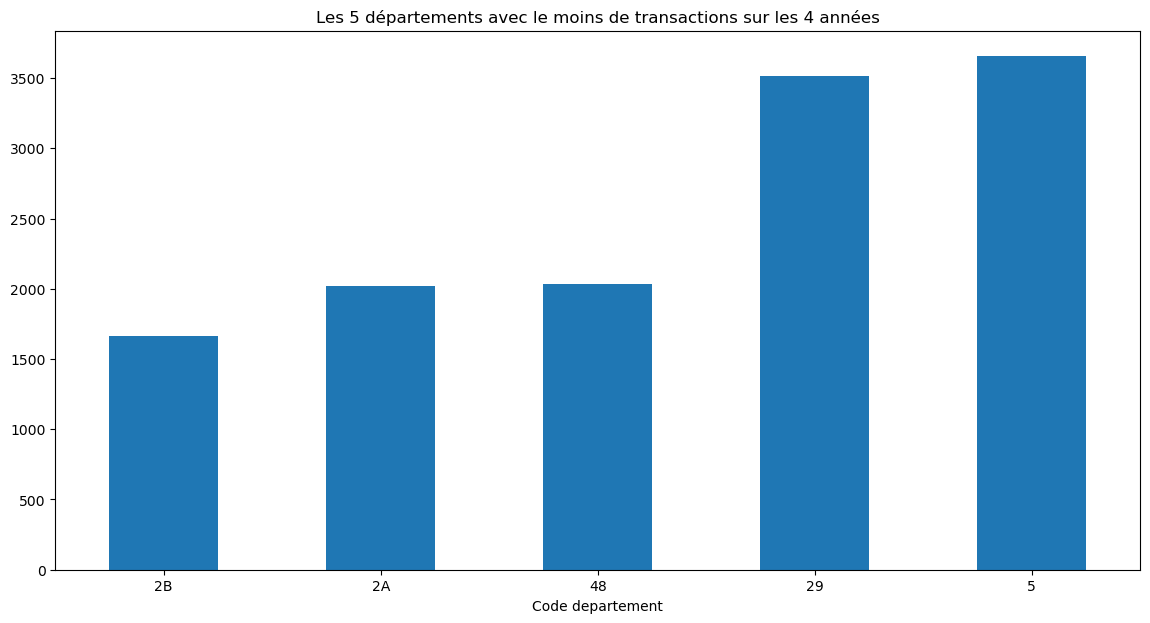

In [24]:
transactiondep2022 = data2022.groupby("Code departement")["Code departement"].count().sort_values(ascending=True)
transac_least_five = transactiondep2022.head(5)
transac_least_five.plot(kind='bar', rot=0, figsize=(14, 7))
plt.title("Les 5 départements avec le moins de transactions sur les 4 années")
plt.show()

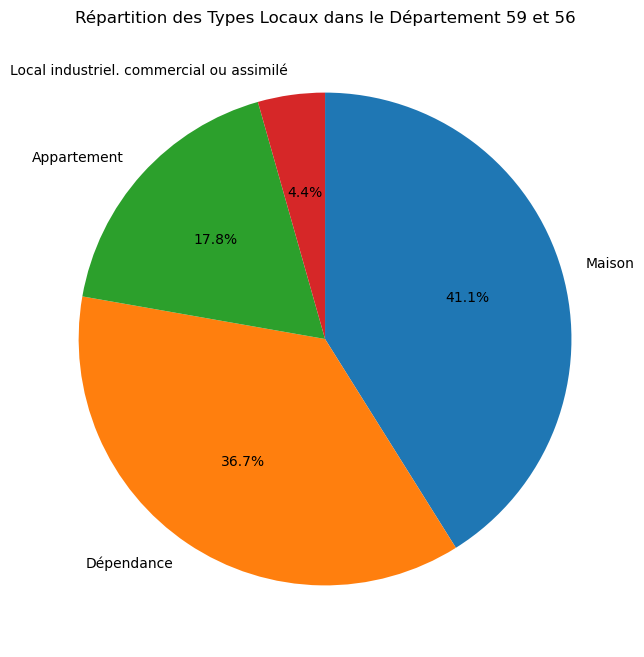

In [25]:
dept_59_56_data = data2022[(data2022['Code departement'] == 59) | (data2022['Code departement'] == 56)]
type_local_counts_filtered22 = dept_59_56_data['Type local'].value_counts()

plt.figure(figsize=(8, 8))
type_local_counts_filtered22.plot(kind='pie', autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Répartition des Types Locaux dans le Département 59 et 56')
plt.ylabel('')  
plt.show()

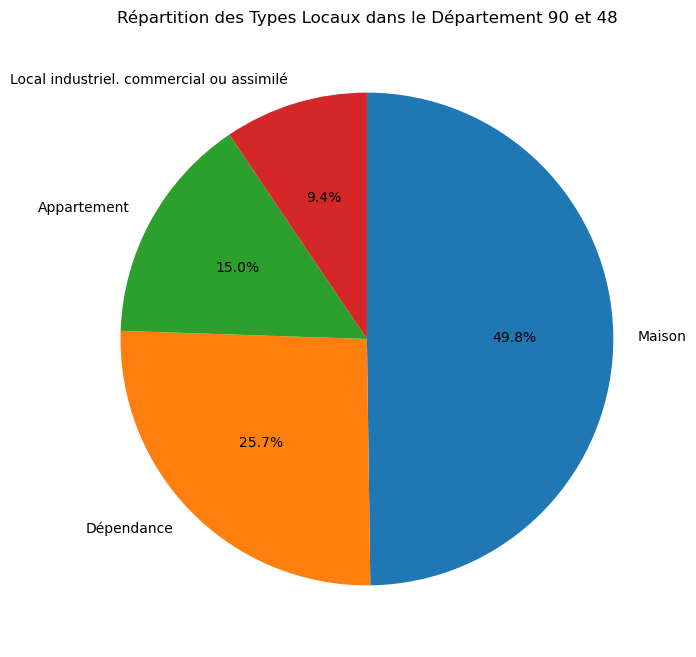

In [26]:
dept_48_90_data = data2022[(data2022['Code departement'] == 48) | (data2022['Code departement'] == 90)]
type_local_counts_ = dept_48_90_data['Type local'].value_counts()

plt.figure(figsize=(8, 8))
type_local_counts_.plot(kind='pie', autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Répartition des Types Locaux dans le Département 90 et 48')
plt.ylabel('')  
plt.show()

In [27]:
valeur_foncière_ville = data2022.groupby("Commune")["Valeur fonciere"].mean().sort_values(ascending=False)
top_20_valeurs = valeur_foncière_ville.head(20)
top_20_valeurs

Commune
LORIENT              3.037827e+08
VANNES               2.996035e+08
HENNEBONT            2.974026e+08
SAINT-AVE            2.433128e+08
ELVEN                2.363304e+08
ARRADON              2.305900e+08
PLOEREN              2.130149e+08
SULNIAC              2.096194e+08
LA TRINITE SURZUR    2.082174e+08
SAINT-NOLFF          2.077347e+08
THEIX-NOYALO         1.978624e+08
BADEN                1.956925e+08
SENE                 1.930235e+08
PLESCOP              1.661078e+08
MEUCON               1.614933e+08
MONTERBLANC          1.379468e+08
LANVAUDAN            1.177181e+08
LARMOR-BADEN         1.111390e+08
SURZUR               9.999337e+07
LE HEZO              9.780031e+07
Name: Valeur fonciere, dtype: float64

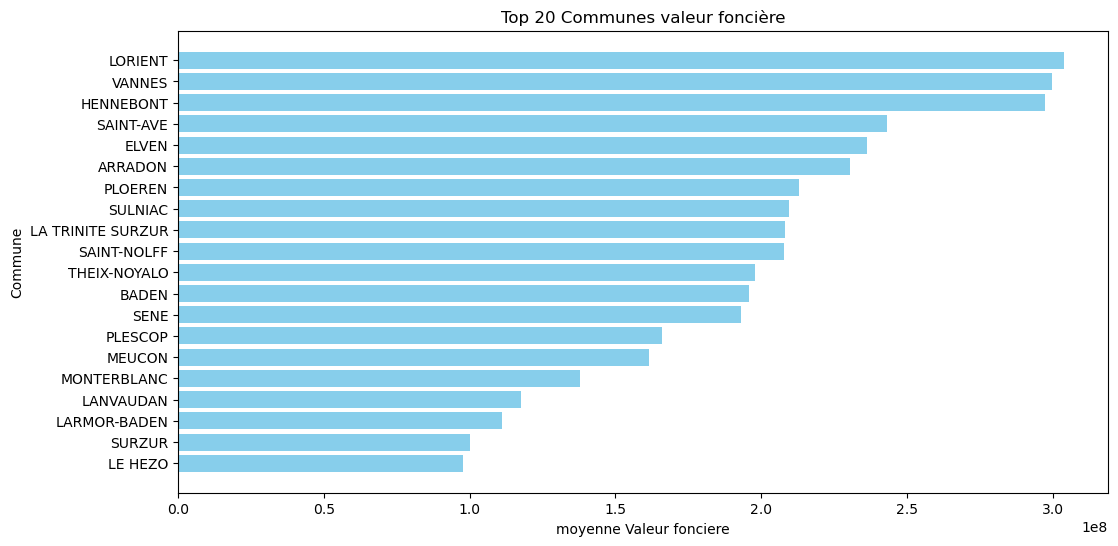

In [28]:
communes = top_20_valeurs.index
mean_values = top_20_valeurs.values
plt.figure(figsize=(12, 6))
plt.barh(communes, mean_values, color='skyblue')
plt.xlabel('moyenne Valeur fonciere')
plt.ylabel('Commune')
plt.title('Top 20 Communes valeur foncière')
plt.gca().invert_yaxis()
plt.show()

In [29]:
data_surface = pd.DataFrame()
data_surface["Commune"] = data2022["Commune"]
data_surface["Surface"] = data2022["Surface reelle bati"] 

In [30]:
surface = data_surface.groupby("Commune")["Surface"].mean().sort_values(ascending=False)

In [31]:
print(type(surface))

<class 'pandas.core.series.Series'>


In [32]:
surface_df = surface.reset_index()
surface_df.columns = ["Commune", "Surface"]

In [33]:
print(type(surface_df))

<class 'pandas.core.frame.DataFrame'>


In [34]:
merged_data_2022 = pd.merge(valeur_foncière_ville, surface_df, on='Commune')
merged_data_2022

,Commune,Valeur fonciere,Surface
0,LORIENT,3.037827e+08,51.134593
1,VANNES,2.996035e+08,36.681549
2,HENNEBONT,2.974026e+08,53.140254
3,SAINT-AVE,2.433128e+08,54.306958
4,ELVEN,2.363304e+08,54.258333
...,...,...,...
28084,AIX,1.560000e+02,0.000000
28085,CALZAN,1.000000e+02,56.000000
28086,LE MONT-SAINT-MICHEL,1.200000e+00,162.000000
28087,BEAUCHEMIN,1.000000e+00,110.000000


In [35]:
filtered_data_merged_2022 = merged_data_2022[merged_data_2022['Surface'] > 0]


In [36]:
filtered_data_merged_2022['Prix par mètre carré'] = filtered_data_merged_2022['Valeur fonciere'] / filtered_data_merged_2022['Surface']

C:\Users\calur\AppData\Local\Temp\ipykernel_8704\4136888048.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_merged_2022['Prix par mètre carré'] = filtered_data_merged_2022['Valeur fonciere'] / filtered_data_merged_2022['Surface']


In [37]:
classee = filtered_data_merged_2022.sort_values(by='Prix par mètre carré', ascending=False)
classtop20 = classee.head(20)

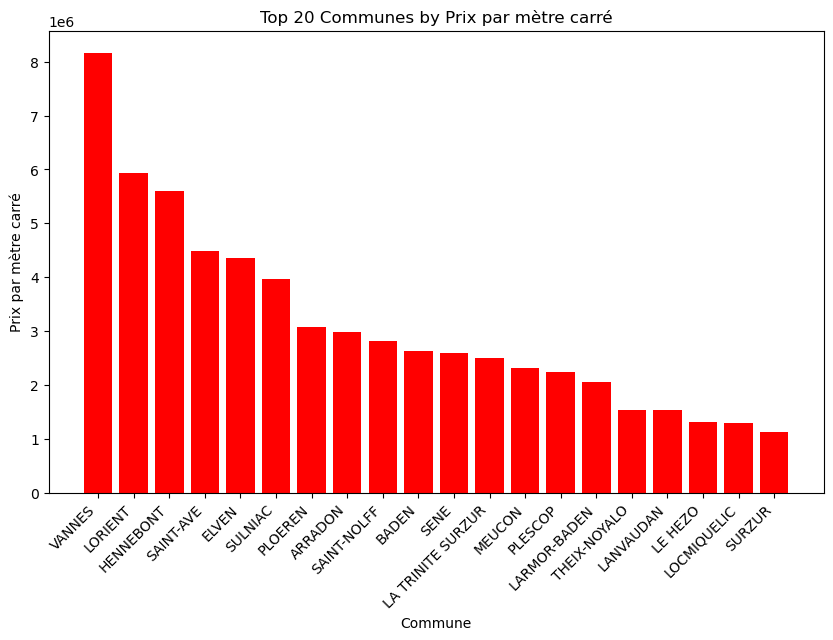

In [38]:
plt.figure(figsize=(10, 6))
plt.bar(classtop20["Commune"], classtop20["Prix par mètre carré"], color='red')
plt.xlabel('Commune')
plt.ylabel('Prix par mètre carré')
plt.title('Top 20 Communes by Prix par mètre carré')
plt.xticks(rotation=45, ha='right') 

plt.show()

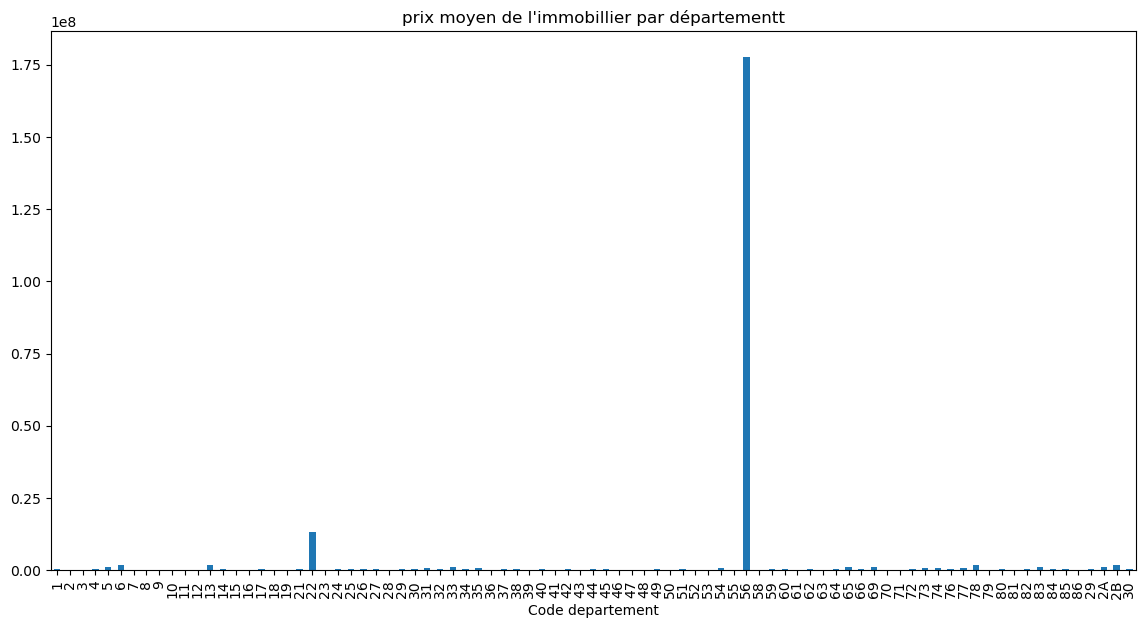

In [39]:
data2022.groupby("Code departement")["Valeur fonciere"].mean().plot(kind='bar',figsize=(14,7))
plt.title("prix moyen de l'immobillier par départementt")
plt.show()

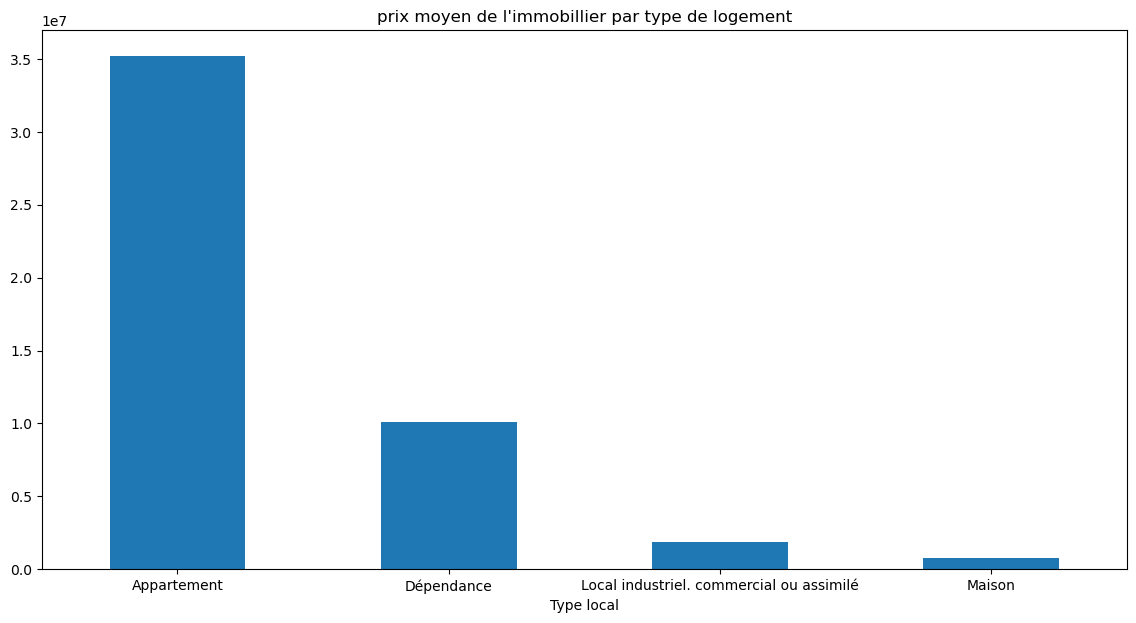

In [40]:
data2022.groupby("Type local")["Valeur fonciere"].mean().plot(kind='bar',rot=0,figsize=(14,7))
plt.title("prix moyen de l'immobillier par type de logement")
plt.show()

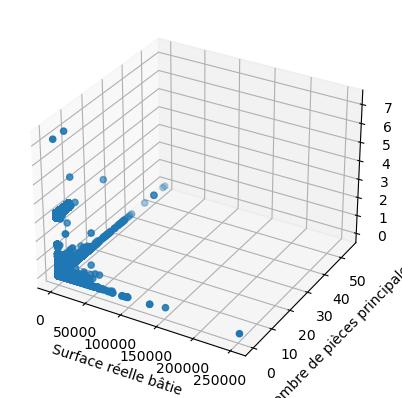

In [41]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data2022['Surface reelle bati'], data2022['Nombre pieces principales'], data2022['Valeur fonciere'])
ax.set_xlabel('Surface réelle bâtie')
ax.set_ylabel('Nombre de pièces principales')
ax.set_zlabel('Valeur foncière')

plt.show()

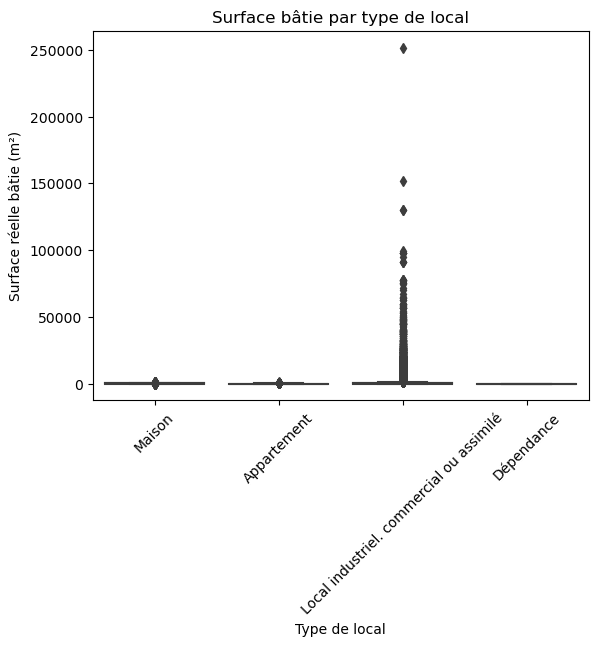

In [42]:
sns.boxplot(x='Type local', y='Surface reelle bati', data=data2022)
plt.xticks(rotation=45)
plt.title('Surface bâtie par type de local')
plt.ylabel('Surface réelle bâtie (m²)')
plt.xlabel('Type de local')
plt.show()

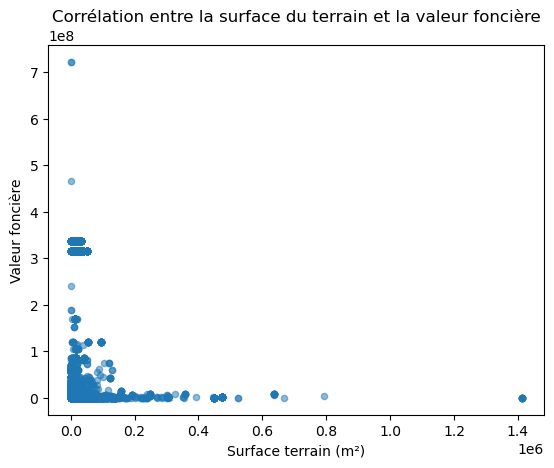

In [43]:
data2022.plot(kind='scatter', x='Surface terrain', y='Valeur fonciere', alpha=0.5)
plt.title('Corrélation entre la surface du terrain et la valeur foncière')
plt.xlabel('Surface terrain (m²)')
plt.ylabel('Valeur foncière')
plt.show()

In [44]:
data2019 =pd.read_csv("valeursfoncieres-2019.txt", sep="|", encoding='utf-8')

C:\Users\calur\AppData\Local\Temp\ipykernel_8704\4259950047.py:1: DtypeWarning: Columns (18,23,24,26,28,31,33,41) have mixed types. Specify dtype option on import or set low_memory=False.
  data2019 =pd.read_csv("valeursfoncieres-2019.txt", sep="|", encoding='utf-8')


In [45]:
data2019.head()

,Identifiant de document,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2019,Vente,...,NaN,1,2.0,Appartement,NaN,20.0,1.0,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2019,Vente,...,NaN,1,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2019,Vente,...,NaN,2,2.0,Appartement,NaN,62.0,3.0,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,08/01/2019,Vente,...,NaN,0,1.0,Maison,NaN,90.0,4.0,S,NaN,940.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,07/01/2019,Vente,...,NaN,0,1.0,Maison,NaN,101.0,5.0,S,NaN,490.0


In [46]:
data2019=data2019.drop(['Identifiant de document','Reference document','1 Articles CGI','2 Articles CGI','3 Articles CGI','4 Articles CGI','No voie', 'B/T/Q','Type de voie', 'Code voie', 'Voie','Prefixe de section',
       'Section', 'No plan', 'No Volume', '1er lot','5 Articles CGI',
       'Surface Carrez du 1er lot', '2eme lot', 'Surface Carrez du 2eme lot',
       '3eme lot', 'Surface Carrez du 3eme lot', '4eme lot',
       'Surface Carrez du 4eme lot', '5eme lot', 'Surface Carrez du 5eme lot',
       'Nombre de lots', 'Code type local','Nature culture speciale', 'Identifiant local', 'Nature culture'],axis=1)

In [47]:
data2019 = data2019.dropna(subset=['Valeur fonciere'])
data2019 = data2019.dropna(subset=['Code postal'])
data2019 = data2019.dropna(subset=['Surface terrain'])
data2019 = data2019.dropna(subset=['Type local'])
data2019 = data2019.dropna(subset=['Surface reelle bati'])
data2019 = data2019.dropna(subset=['Nombre pieces principales'])

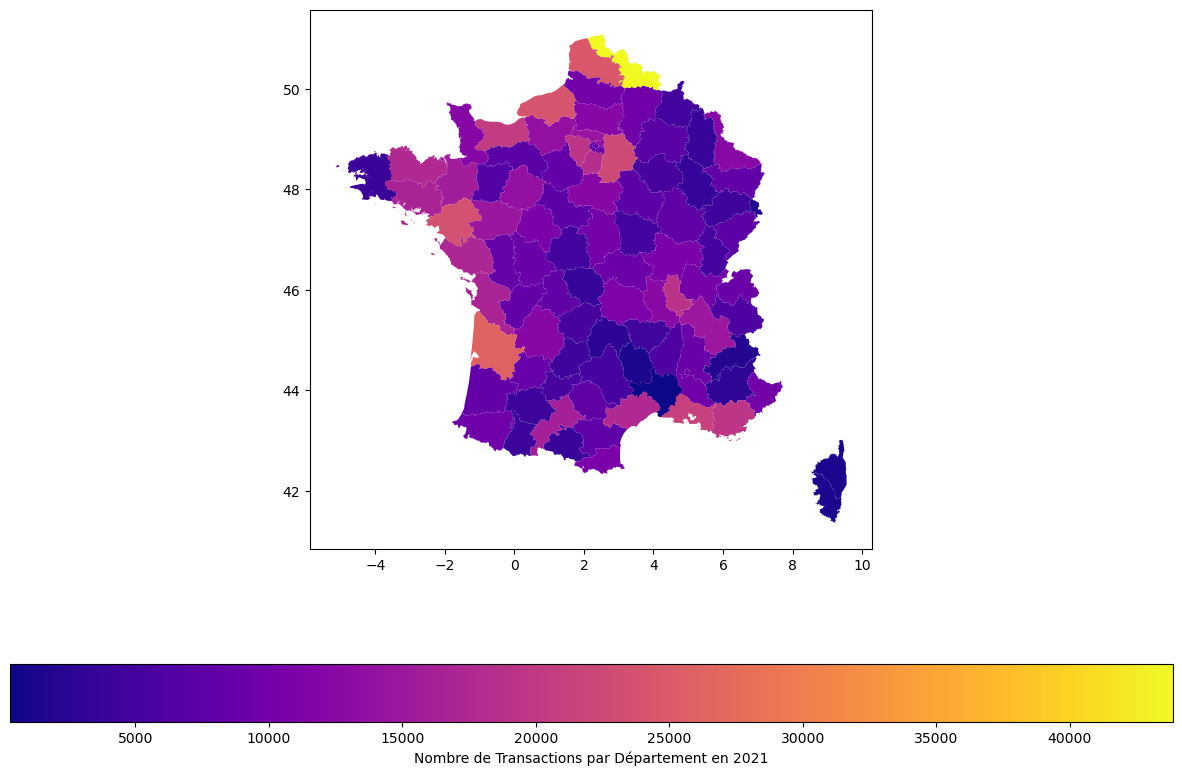

In [48]:
dep_transac2019 = gpd.read_file('https://www.data.gouv.fr/fr/datasets/r/90b9341a-e1f7-4d75-a73c-bbc010c7feeb')# fichier GeoJSON contenant
dep_transac2019=dep_transac2019.replace("2A","201")
dep_transac2019=dep_transac2019.replace("2B","202")
dep_transac2019['code'] = dep_transac2019['code'].astype(int)
transac_dep2019=data2019.groupby("Code departement")["Code departement"].count().reset_index(name='Nombre de transactions')
transac_dep2019=transac_dep2019.replace("2A","201")
transac_dep2019=transac_dep2019.replace("2B","202")
transac_dep2019['Code departement'] = transac_dep2019['Code departement'].astype(int)
dep_transac2019 = dep_transac2019.merge(transac_dep2019, left_on='code', right_on='Code departement')
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
dep_transac2019.plot(column='Nombre de transactions', ax=ax, legend=True, cmap='plasma',
                 legend_kwds={'label': "Nombre de Transactions par Département en 2021",
                              'orientation': "horizontal"})
plt.show()

In [49]:
data2019['Date mutation'] = pd.to_datetime(data2019['Date mutation'], format='%d/%m/%Y')

In [50]:
data2019['Mois'] = data2019['Date mutation'].dt.to_period('M')

In [51]:
transactions_mensuelle_2019 = data2019.groupby('Mois').size()

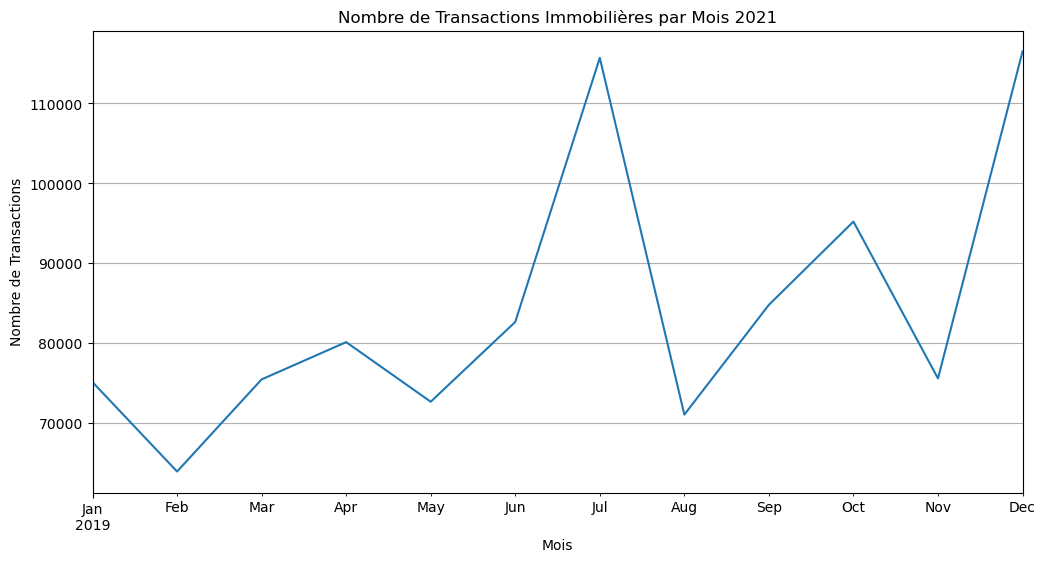

In [52]:
transactions_mensuelle_2019.plot(kind='line', figsize=(12, 6))
plt.title('Nombre de Transactions Immobilières par Mois 2021')
plt.xlabel('Mois')
plt.ylabel('Nombre de Transactions')
plt.grid(True)
plt.show()

In [53]:
data2019['Valeur fonciere'] = data2019['Valeur fonciere'].replace(',', '.', regex=True).astype(float)
valeur_fonciere_moyenne_par_mois2019 = data2019.groupby('Mois')['Valeur fonciere'].mean().reset_index()
valeur_fonciere_moyenne_par_mois2019.columns = ['Date', 'Valeur Fonciere Moyenne']
print(valeur_fonciere_moyenne_par_mois2019)

       Date  Valeur Fonciere Moyenne
0   2019-01             7.626923e+06
1   2019-02             6.911826e+05
2   2019-03             1.590842e+06
3   2019-04             5.033848e+06
4   2019-05             7.853923e+05
5   2019-06             9.007140e+05
6   2019-07             3.013030e+06
7   2019-08             3.383856e+05
8   2019-09             7.621923e+05
9   2019-10             1.814848e+06
10  2019-11             1.445875e+06
11  2019-12             4.099763e+06


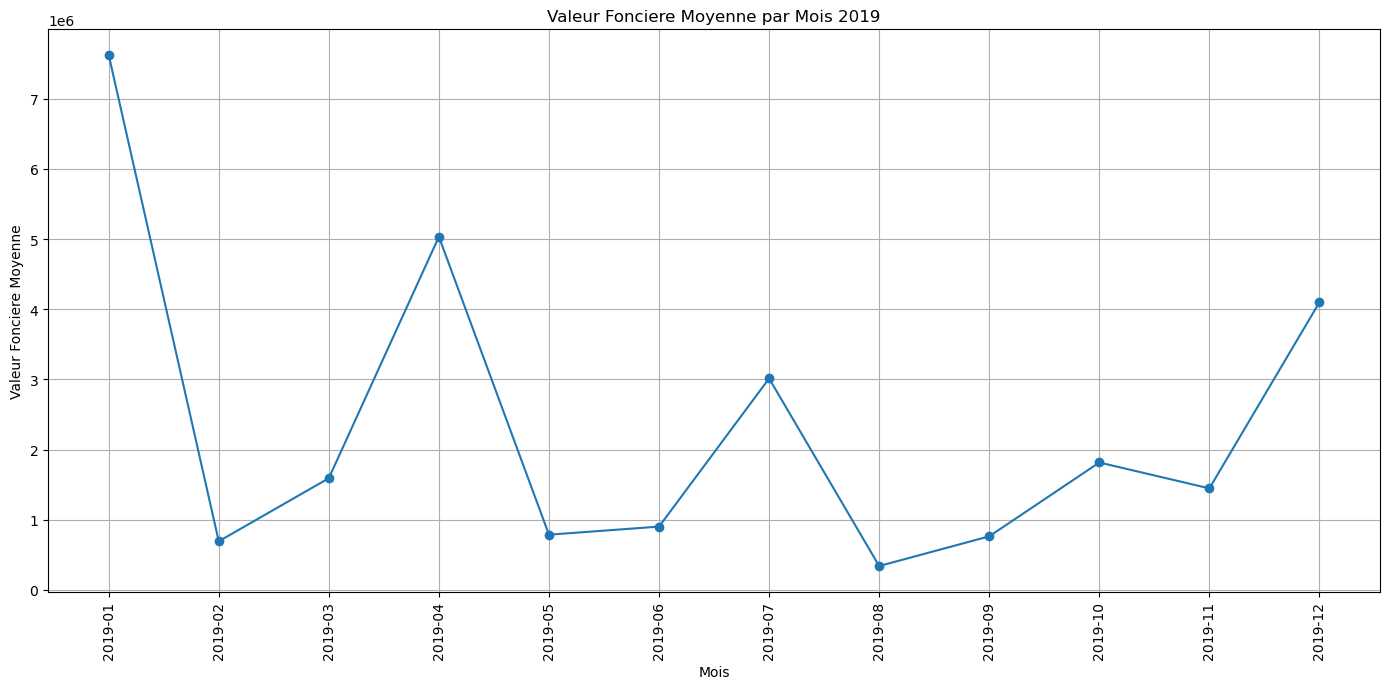

In [54]:
plt.figure(figsize=(14, 7))
plt.plot(valeur_fonciere_moyenne_par_mois2019['Date'].astype(str), valeur_fonciere_moyenne_par_mois2019['Valeur Fonciere Moyenne'], marker='o')
plt.xticks(rotation=90)
plt.xlabel('Mois')
plt.ylabel('Valeur Fonciere Moyenne')
plt.title('Valeur Fonciere Moyenne par Mois 2019')
plt.grid(True)
plt.tight_layout()
plt.show()

In [55]:
transactionTopFive2019=data2019.groupby("Code departement")["Code departement"].count().sort_values(ascending=False)
transac2019=transactionTopFive2019[0:5]


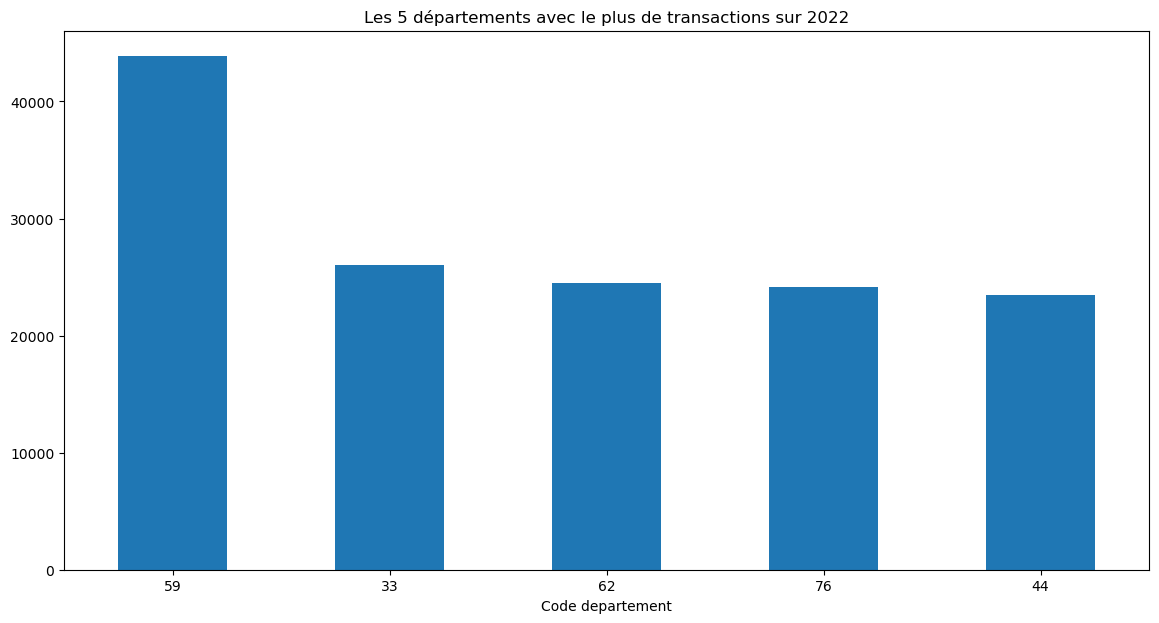

In [56]:
transac2019.plot(kind='bar',rot=0,figsize=(14,7))
plt.title("Les 5 départements avec le plus de transactions sur 2022")
plt.show()

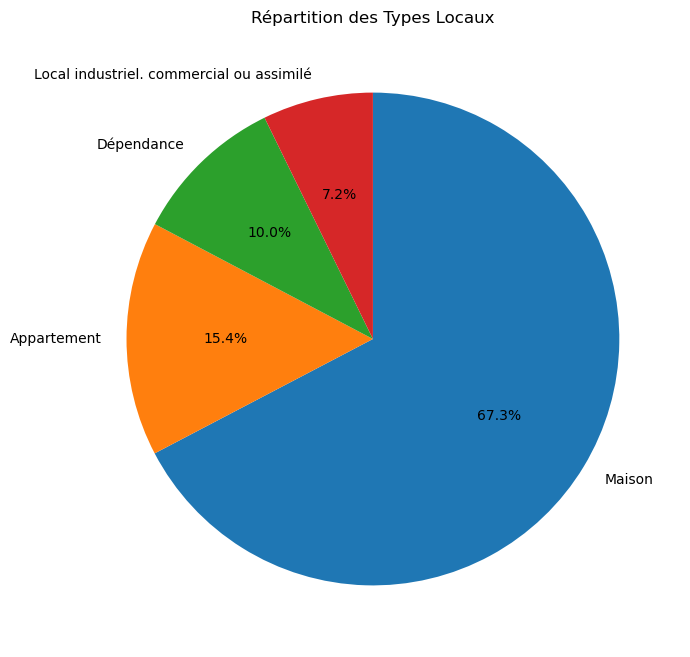

In [57]:
type_local_counts_filtered_2019 = data2019['Type local'].value_counts()

plt.figure(figsize=(8, 8))
type_local_counts_filtered_2019.plot(kind='pie', autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Répartition des Types Locaux')
plt.ylabel('')  
plt.show()

In [58]:
dept_59_data_2019 = data2019[data2019['Code departement'] == 59]
type_local_counts_filtered19 = dept_59_data_2019['Type local'].value_counts()

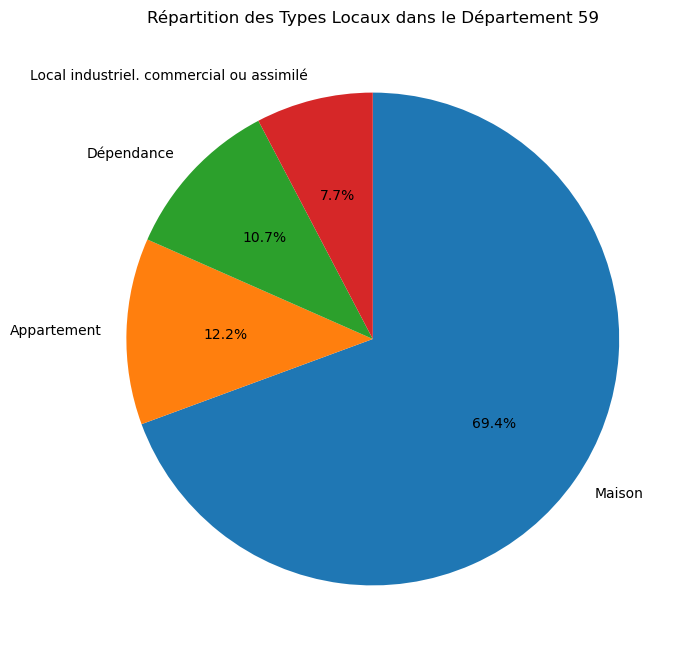

In [59]:
plt.figure(figsize=(8, 8))
type_local_counts_filtered19.plot(kind='pie', autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Répartition des Types Locaux dans le Département 59')
plt.ylabel('')  
plt.show()

In [60]:
data2019['Nombre pieces principales'] = data2019['Nombre pieces principales'].replace(',', '.', regex=True).astype(float)
nb_piece_par_mois2019 = data2019.groupby('Mois')['Nombre pieces principales'].mean().reset_index()
nb_piece_par_mois2019.columns = ['Mois', 'Nombre pieces principales']
print(nb_piece_par_mois2019)

       Mois  Nombre pieces principales
0   2019-01                   3.218621
1   2019-02                   3.324906
2   2019-03                   3.199438
3   2019-04                   3.169185
4   2019-05                   3.216808
5   2019-06                   3.327342
6   2019-07                   3.276778
7   2019-08                   3.596299
8   2019-09                   3.331399
9   2019-10                   3.230158
10  2019-11                   3.180468
11  2019-12                   2.979587


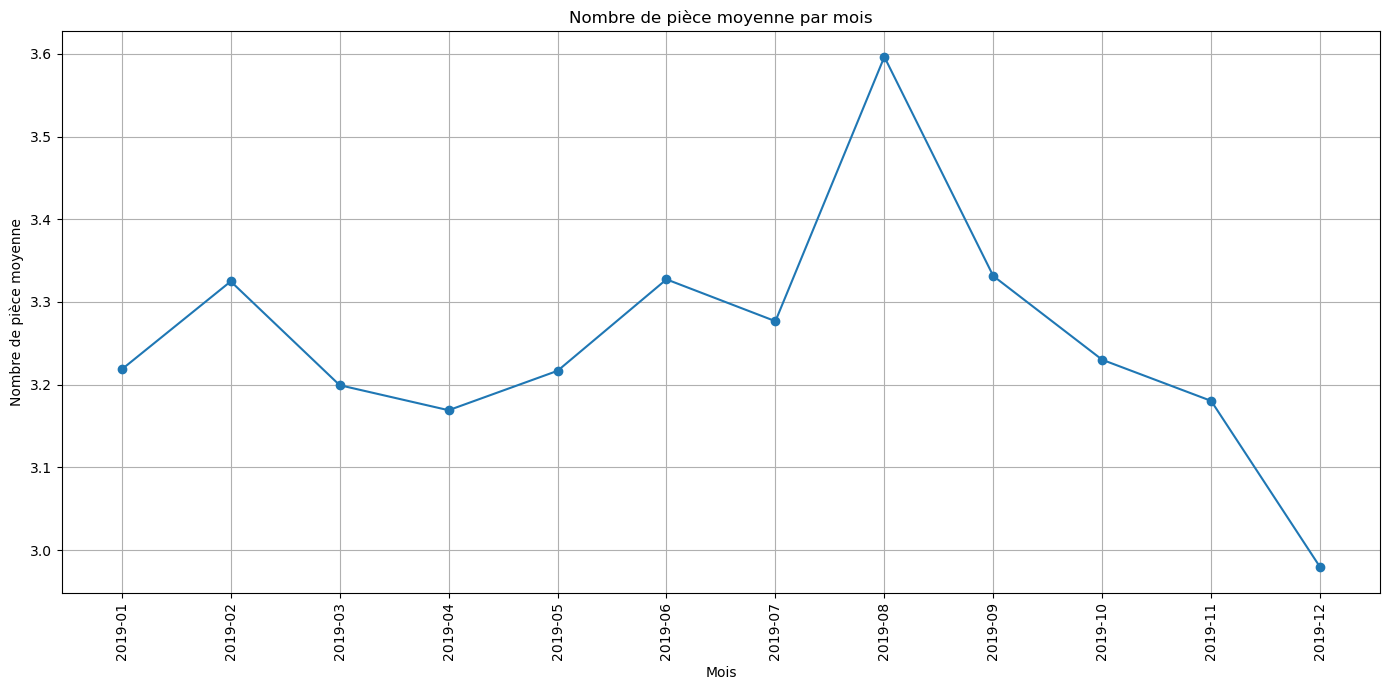

In [61]:
plt.figure(figsize=(14, 7))
plt.plot(nb_piece_par_mois2019['Mois'].astype(str), nb_piece_par_mois2019['Nombre pieces principales'], marker='o')
plt.xticks(rotation=90)
plt.xlabel('Mois')
plt.ylabel('Nombre de pièce moyenne')
plt.title('Nombre de pièce moyenne par mois')
plt.grid(True)
plt.tight_layout()
plt.show()

In [62]:
data2019['Surface reelle bati'] = data2019['Surface reelle bati'].replace(',', '.', regex=True).astype(float)
Surfacereellebati_par_mois2019 = data2019.groupby('Mois')['Surface reelle bati'].mean().reset_index()
Surfacereellebati_par_mois2019.columns = ['Mois', 'Surface reelle bati']
print(Surfacereellebati_par_mois2019)

       Mois  Surface reelle bati
0   2019-01           131.331469
1   2019-02           125.129180
2   2019-03           132.025152
3   2019-04           134.978824
4   2019-05           127.583294
5   2019-06           128.172985
6   2019-07           122.409592
7   2019-08           115.712455
8   2019-09           122.836460
9   2019-10           123.019802
10  2019-11           131.890200
11  2019-12           135.562024


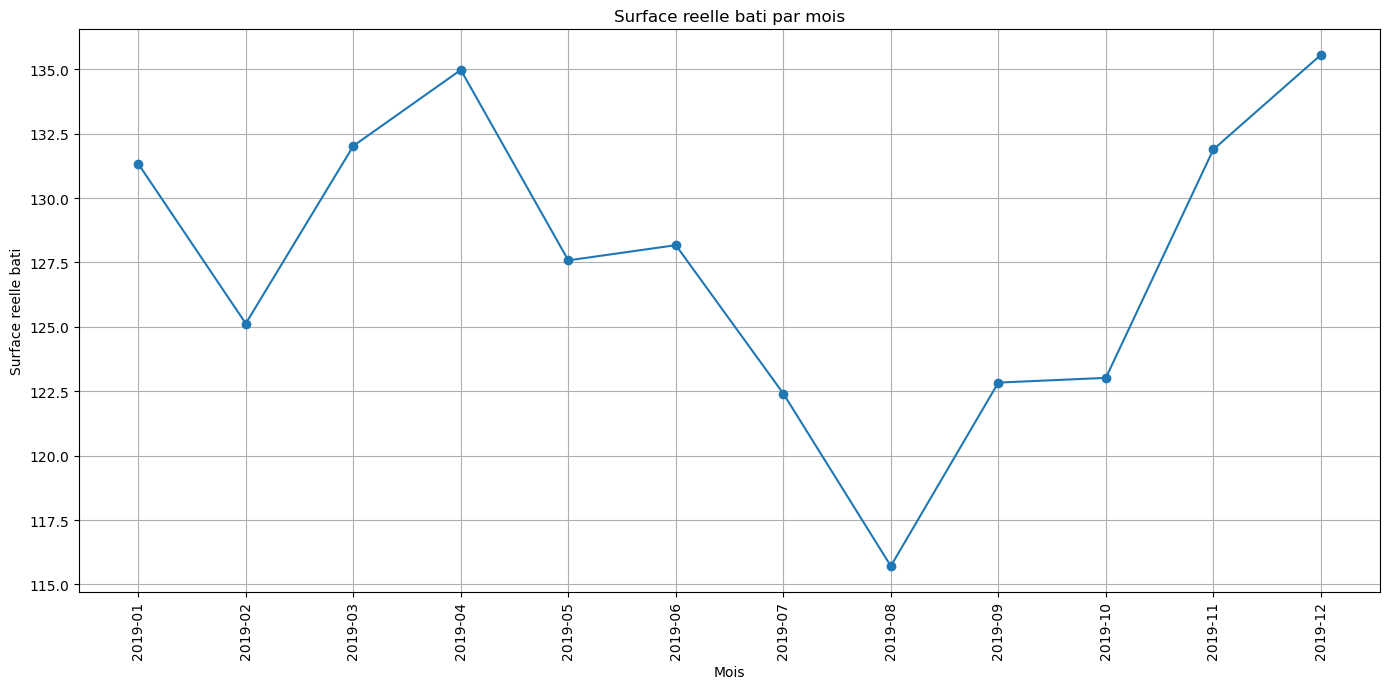

In [63]:
plt.figure(figsize=(14, 7))
plt.plot(Surfacereellebati_par_mois2019['Mois'].astype(str), Surfacereellebati_par_mois2019['Surface reelle bati'], marker='o')
plt.xticks(rotation=90)
plt.xlabel('Mois')
plt.ylabel('Surface reelle bati')
plt.title('Surface reelle bati par mois')
plt.grid(True)
plt.tight_layout()
plt.show()

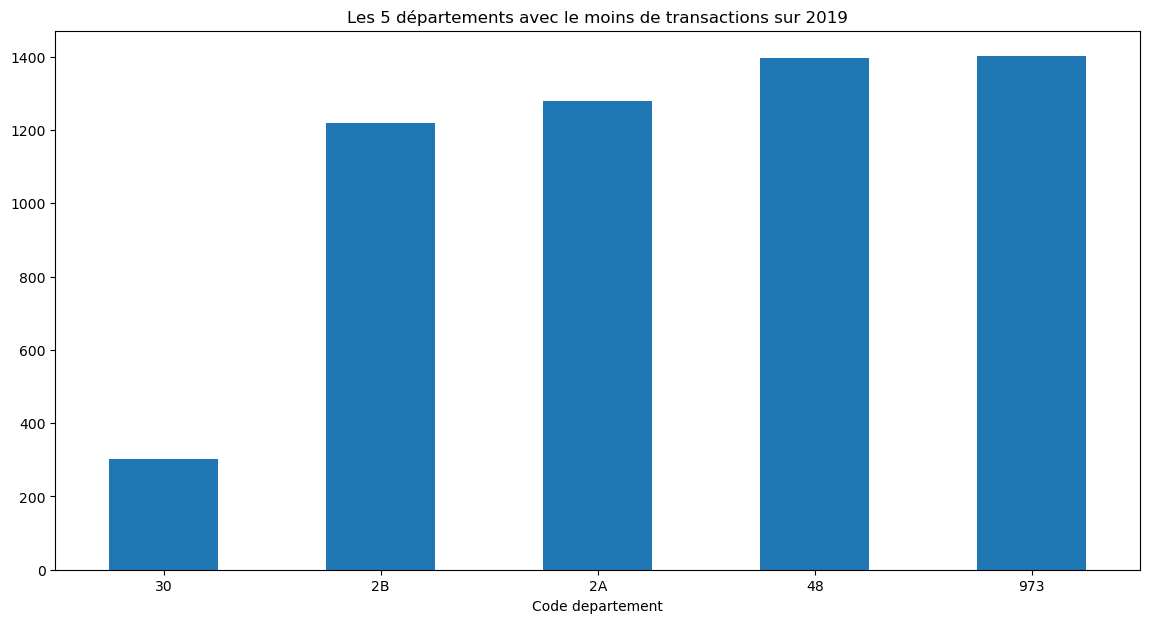

In [64]:
transactiondep2019 = data2019.groupby("Code departement")["Code departement"].count().sort_values(ascending=True)
transac_least_five_19 = transactiondep2019.head(5)
transac_least_five_19.plot(kind='bar', rot=0, figsize=(14, 7))
plt.title("Les 5 départements avec le moins de transactions sur 2019")
plt.show()

C:\Users\calur\AppData\Local\Temp\ipykernel_8704\1594493551.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dept_59_33_data = data2019[(data2019['Code departement'] == 59) | (data2022['Code departement'] == 33)]


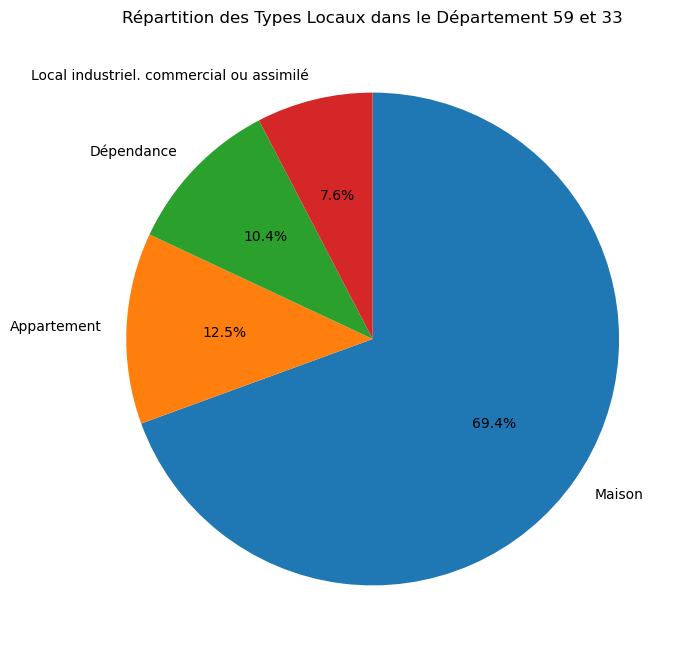

In [65]:
dept_59_33_data = data2019[(data2019['Code departement'] == 59) | (data2022['Code departement'] == 33)]
type_local_counts_filtered19 = dept_59_33_data['Type local'].value_counts()

plt.figure(figsize=(8, 8))
type_local_counts_filtered19.plot(kind='pie', autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Répartition des Types Locaux dans le Département 59 et 33')
plt.ylabel('')  
plt.show()

C:\Users\calur\AppData\Local\Temp\ipykernel_8704\1329043152.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dept_48_30_data = data2019[(data2019['Code departement'] == 30) | (data2022['Code departement'] == 48)]


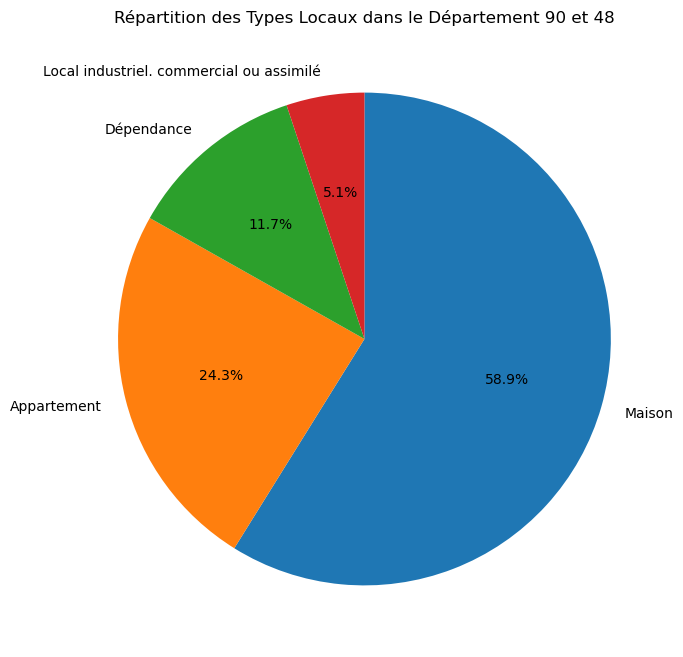

In [66]:
dept_48_30_data = data2019[(data2019['Code departement'] == 30) | (data2022['Code departement'] == 48)]
type_local_counts_19 = dept_48_30_data['Type local'].value_counts()

plt.figure(figsize=(8, 8))
type_local_counts_19.plot(kind='pie', autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Répartition des Types Locaux dans le Département 90 et 48')
plt.ylabel('')  
plt.show()

In [67]:
valeur_foncière_ville19 = data2019.groupby("Commune")["Valeur fonciere"].mean().sort_values(ascending=False)
top_20_valeurs19 = valeur_foncière_ville19.head(20)
top_20_valeurs19

Commune
RUNGIS                         1.969336e+08
PLOUGOURVEST                   1.297507e+08
NEUILLY-SUR-SEINE              1.135452e+08
CASTELNAU LE LEZ               1.047389e+08
SAINT-GERMAIN-LA-BLANCHE-HE    9.206847e+07
PLOUZEVEDE                     9.080819e+07
ERAGNY-SUR-OISE                9.033327e+07
VILLEJUIF                      8.468184e+07
SAINT-ANDRE-SUR-ORNE           8.440624e+07
BELLENGREVILLE                 7.630095e+07
LONGJUMEAU                     7.492189e+07
FLEURY-SUR-ORNE                7.422347e+07
NEUILLY-SUR-MARNE              7.263728e+07
NEUILLY-PLAISANCE              6.982188e+07
GAVRUS                         6.765487e+07
MAY-SUR-ORNE                   6.699992e+07
SAINT-MARTIN-DE-FONTENAY       6.695494e+07
SAINT-GERMAIN-LE-VASSON        6.659031e+07
MOULT-CHICHEBOVILLE            6.576531e+07
LE HOM                         6.482118e+07
Name: Valeur fonciere, dtype: float64

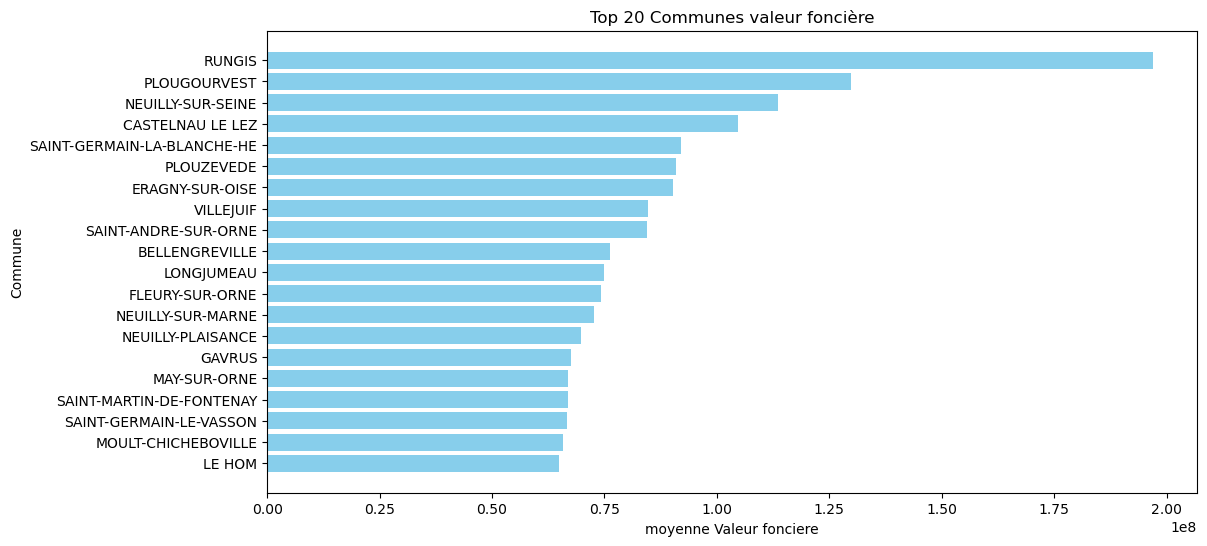

In [68]:
communes19 = top_20_valeurs19.index
mean_values19 = top_20_valeurs19.values
plt.figure(figsize=(12, 6))
plt.barh(communes19, mean_values19, color='skyblue')
plt.xlabel('moyenne Valeur fonciere')
plt.ylabel('Commune')
plt.title('Top 20 Communes valeur foncière')
plt.gca().invert_yaxis()
plt.show()

In [69]:
data_surface19 = pd.DataFrame()
data_surface19["Commune"] = data2019["Commune"]
data_surface19["Surface"] = data2019["Surface reelle bati"] 

In [70]:
surface19 = data_surface19.groupby("Commune")["Surface"].mean().sort_values(ascending=False)

In [71]:
surface_df19 = surface19.reset_index()
surface_df19.columns = ["Commune", "Surface"]

In [72]:
merged_data_2019 = pd.merge(valeur_foncière_ville19, surface_df19, on='Commune')
merged_data_2019

,Commune,Valeur fonciere,Surface
0,RUNGIS,1.969336e+08,57.677686
1,PLOUGOURVEST,1.297507e+08,115.740741
2,NEUILLY-SUR-SEINE,1.135452e+08,471.294737
3,CASTELNAU LE LEZ,1.047389e+08,94.042048
4,SAINT-GERMAIN-LA-BLANCHE-HE,9.206847e+07,82.490385
...,...,...,...
29507,CHISA,1.500000e+02,158.000000
29508,WARLUZEL,1.000000e+00,23.000000
29509,LES EPARGES,1.000000e+00,28.000000
29510,BOURGUIGNONS,1.000000e+00,0.000000


In [73]:
filtered_data_merged_2019 = merged_data_2019[merged_data_2019['Surface'] > 0]


In [74]:
filtered_data_merged_2019['Prix par mètre carré'] = filtered_data_merged_2019['Valeur fonciere'] / filtered_data_merged_2019['Surface']

C:\Users\calur\AppData\Local\Temp\ipykernel_8704\3796476715.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_merged_2019['Prix par mètre carré'] = filtered_data_merged_2019['Valeur fonciere'] / filtered_data_merged_2019['Surface']


In [75]:
classee19 = filtered_data_merged_2019.sort_values(by='Prix par mètre carré', ascending=False)
classtop2019 = classee19.head(20)

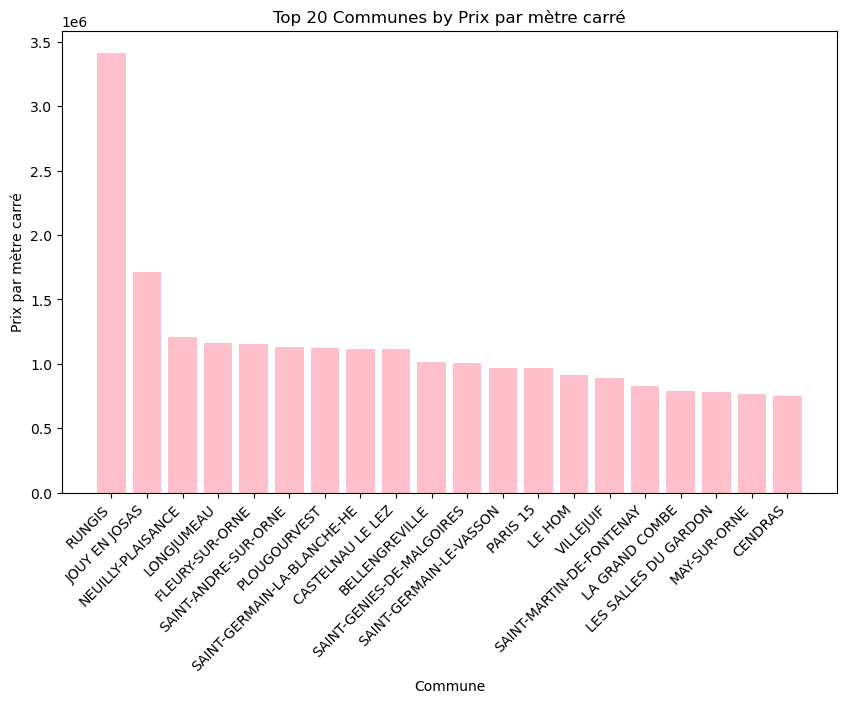

In [76]:
plt.figure(figsize=(10, 6))
plt.bar(classtop2019["Commune"], classtop2019["Prix par mètre carré"], color='pink')
plt.xlabel('Commune')
plt.ylabel('Prix par mètre carré')
plt.title('Top 20 Communes by Prix par mètre carré')
plt.xticks(rotation=45, ha='right') 

plt.show()

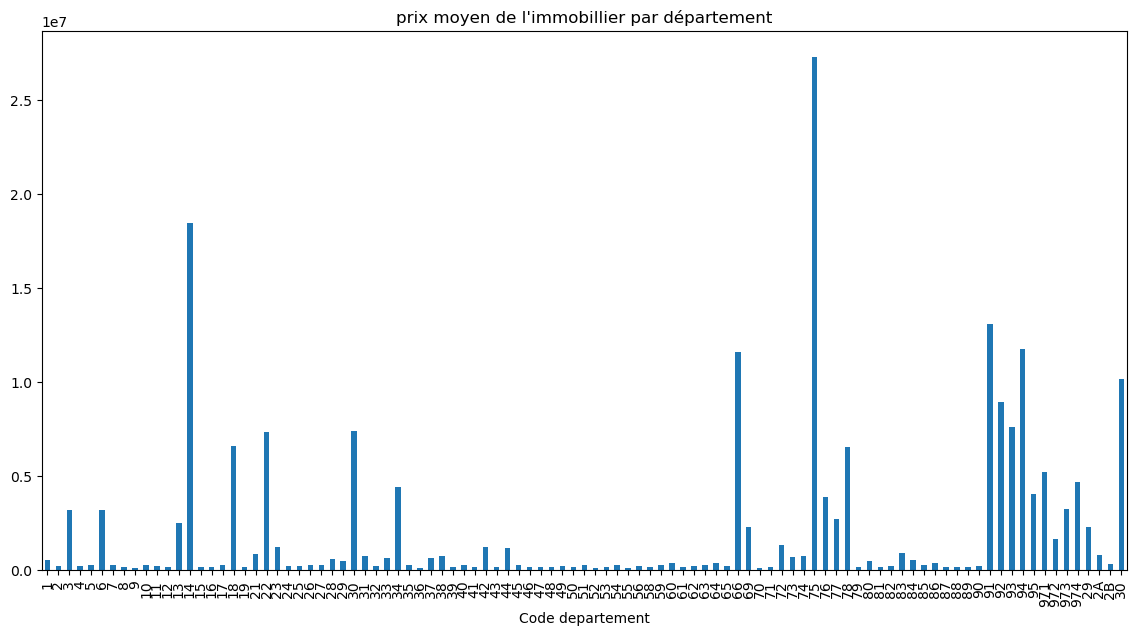

In [77]:
data2019.groupby("Code departement")["Valeur fonciere"].mean().plot(kind='bar',figsize=(14,7))
plt.title("prix moyen de l'immobillier par département")
plt.show()

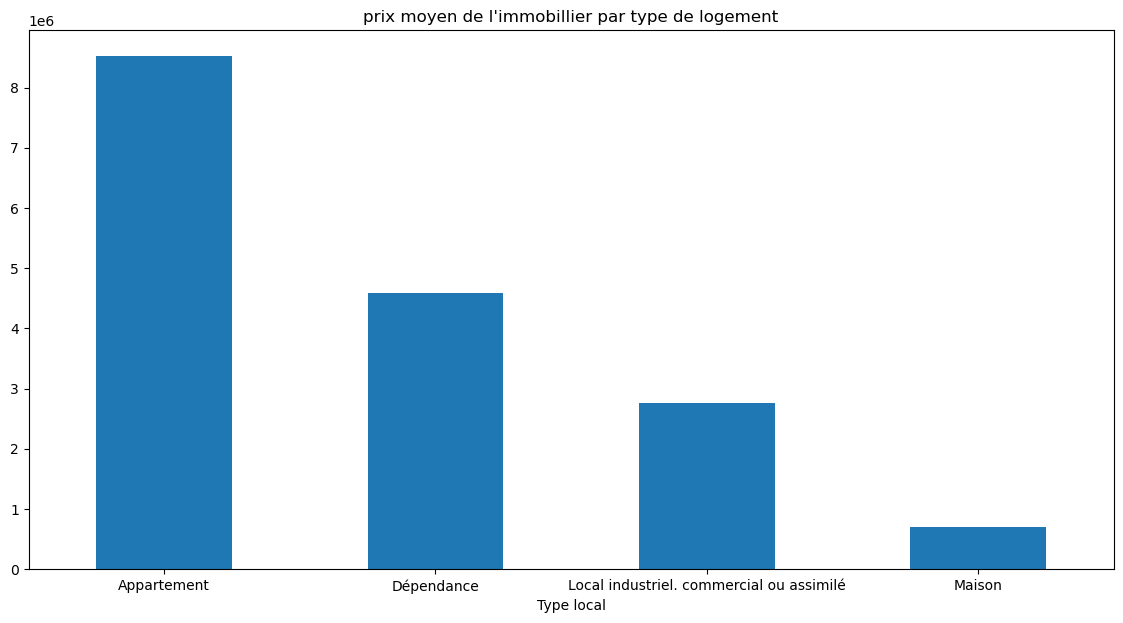

In [78]:
data2019.groupby("Type local")["Valeur fonciere"].mean().plot(kind='bar',rot=0,figsize=(14,7))
plt.title("prix moyen de l'immobillier par type de logement")
plt.show()

In [79]:
data2021 =pd.read_csv("valeursfoncieres-2021.txt", sep="|", encoding='utf-8')
data2020 =pd.read_csv("valeursfoncieres-2020.txt", sep="|", encoding='utf-8')

C:\Users\calur\AppData\Local\Temp\ipykernel_8704\715811521.py:1: DtypeWarning: Columns (18,23,24,26,28,29,30,31,33,41) have mixed types. Specify dtype option on import or set low_memory=False.
  data2021 =pd.read_csv("valeursfoncieres-2021.txt", sep="|", encoding='utf-8')
C:\Users\calur\AppData\Local\Temp\ipykernel_8704\715811521.py:2: DtypeWarning: Columns (18,23,24,26,28,31,33,41) have mixed types. Specify dtype option on import or set low_memory=False.
  data2020 =pd.read_csv("valeursfoncieres-2020.txt", sep="|", encoding='utf-8')


In [80]:
data2021=data2021.drop(['Identifiant de document','Reference document','1 Articles CGI','2 Articles CGI','3 Articles CGI','4 Articles CGI','No voie', 'B/T/Q','Type de voie', 'Code voie', 'Voie','Prefixe de section',
       'Section', 'No plan', 'No Volume', '1er lot','5 Articles CGI',
       'Surface Carrez du 1er lot', '2eme lot', 'Surface Carrez du 2eme lot',
       '3eme lot', 'Surface Carrez du 3eme lot', '4eme lot',
       'Surface Carrez du 4eme lot', '5eme lot', 'Surface Carrez du 5eme lot',
       'Nombre de lots', 'Code type local','Nature culture speciale', 'Identifiant local'],axis=1)

data2021.head(10)

,No disposition,Date mutation,Nature mutation,Valeur fonciere,Code postal,Commune,Code departement,Code commune,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain
0,1,05/01/2021,Vente,"185000,00",1370.0,VAL-REVERMONT,1,426.0,Dépendance,0.0,0.0,S,2410.0
1,1,05/01/2021,Vente,"185000,00",1370.0,VAL-REVERMONT,1,426.0,Maison,97.0,5.0,S,2410.0
2,1,06/01/2021,Vente,"10,00",1290.0,BEY,1,42.0,NaN,NaN,NaN,BT,530.0
3,1,04/01/2021,Vente,"204332,00",1310.0,BUELLAS,1,65.0,Maison,88.0,4.0,S,866.0
4,1,06/01/2021,Vente,"320000,00",1250.0,MONTAGNAT,1,254.0,Maison,168.0,5.0,S,1426.0
5,1,06/01/2021,Vente,"320000,00",1250.0,MONTAGNAT,1,254.0,Dépendance,0.0,0.0,S,1426.0
6,2,04/01/2021,Vente,"36,30",1250.0,CORVEISSIAT,1,125.0,NaN,NaN,NaN,BT,121.0
7,1,04/01/2021,Vente,"176000,00",1000.0,SAINT-DENIS-LES-BOURG,1,344.0,Dépendance,0.0,0.0,NaN,NaN
8,1,04/01/2021,Vente,"176000,00",1000.0,SAINT-DENIS-LES-BOURG,1,344.0,Appartement,71.0,3.0,NaN,NaN
9,2,11/01/2021,Vente,"400,00",1310.0,MONTCET,1,259.0,NaN,NaN,NaN,P,460.0


In [81]:
data2020=data2020.drop(['Identifiant de document','Reference document','1 Articles CGI','2 Articles CGI','3 Articles CGI','4 Articles CGI','No voie', 'B/T/Q','Type de voie', 'Code voie', 'Voie','Prefixe de section',
       'Section', 'No plan', 'No Volume', '1er lot','5 Articles CGI',
       'Surface Carrez du 1er lot', '2eme lot', 'Surface Carrez du 2eme lot',
       '3eme lot', 'Surface Carrez du 3eme lot', '4eme lot',
       'Surface Carrez du 4eme lot', '5eme lot', 'Surface Carrez du 5eme lot',
       'Nombre de lots', 'Code type local','Nature culture speciale', 'Identifiant local'],axis=1)

data2020.head(10)

,No disposition,Date mutation,Nature mutation,Valeur fonciere,Code postal,Commune,Code departement,Code commune,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain
0,1,07/01/2020,Vente,"8000,00",1250.0,CEYZERIAT,1,72,NaN,NaN,NaN,T,1061.0
1,1,02/01/2020,Vente,"2175,00",1290.0,LAIZ,1,203,NaN,NaN,NaN,BT,85.0
2,1,02/01/2020,Vente,"2175,00",1290.0,LAIZ,1,203,NaN,NaN,NaN,T,1115.0
3,1,02/01/2020,Vente,"2175,00",1290.0,LAIZ,1,203,NaN,NaN,NaN,T,1940.0
4,1,02/01/2020,Vente,"2175,00",1290.0,LAIZ,1,203,NaN,NaN,NaN,T,1148.0
5,1,02/01/2020,Vente,"2175,00",1290.0,LAIZ,1,203,NaN,NaN,NaN,T,2960.0
6,1,07/01/2020,Vente,"75000,00",1960.0,PERONNAS,1,289,NaN,NaN,NaN,AB,610.0
7,1,07/01/2020,Vente,"123,00",1370.0,VAL-REVERMONT,1,426,NaN,NaN,NaN,S,55.0
8,1,07/01/2020,Vente,"123,00",1370.0,VAL-REVERMONT,1,426,NaN,NaN,NaN,S,68.0
9,1,09/01/2020,Vente,"72000,00",1270.0,COLIGNY,1,108,NaN,NaN,NaN,J,328.0


In [82]:
data2021 = data2021.dropna(subset=['Valeur fonciere'])
data2020 = data2020.dropna(subset=['Valeur fonciere'])
data2021 = data2021.dropna(subset=['Code postal'])
data2020 = data2020.dropna(subset=['Code postal'])

In [83]:
data2021=data2021.drop(['Nature culture'],axis=1)

In [84]:
data2020=data2020.drop(['Nature culture'],axis=1)

In [85]:
data2021 = data2021.dropna(subset=['Valeur fonciere'])
data2021 = data2021.dropna(subset=['Code postal'])
data2021 = data2021.dropna(subset=['Surface terrain'])
data2021 = data2021.dropna(subset=['Type local'])
data2021 = data2021.dropna(subset=['Surface reelle bati'])
data2021 = data2021.dropna(subset=['Nombre pieces principales'])

In [86]:
data2020 = data2020.dropna(subset=['Valeur fonciere'])
data2020 = data2020.dropna(subset=['Code postal'])
data2020 = data2020.dropna(subset=['Surface terrain'])
data2020 = data2020.dropna(subset=['Type local'])
data2020 = data2020.dropna(subset=['Surface reelle bati'])
data2020 = data2020.dropna(subset=['Nombre pieces principales'])

In [87]:
nombre_transa_immo22=len(data2022)
nombre_transa_immo21=len(data2021)
nombre_transa_immo20=len(data2020)
nombre_transa_immo19=len(data2019)

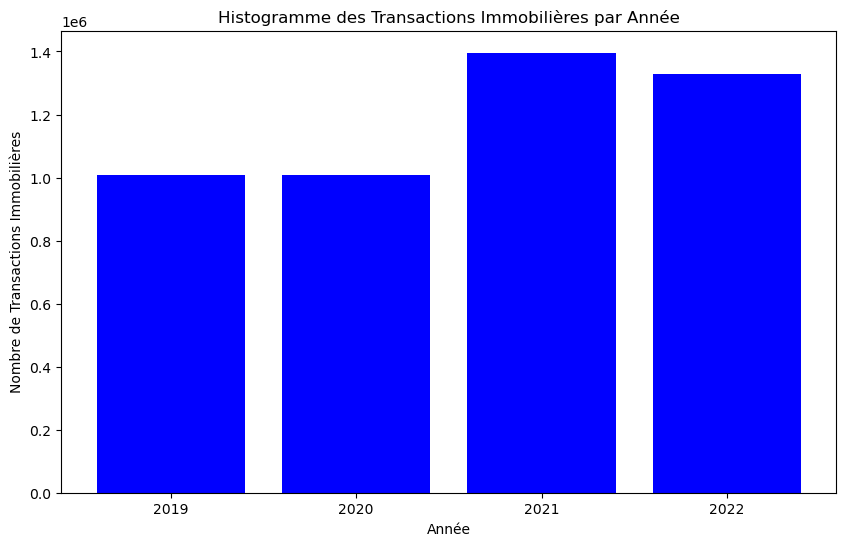

In [88]:
years = ['2019', '2020', '2021', '2022']
transactions = [nombre_transa_immo19, nombre_transa_immo20, nombre_transa_immo21, nombre_transa_immo22]

plt.figure(figsize=(10, 6))
plt.bar(years, transactions, color='blue')
plt.xlabel('Année')
plt.ylabel('Nombre de Transactions Immobilières')
plt.title('Histogramme des Transactions Immobilières par Année')
plt.show()

In [89]:
data2020['Date mutation'] = pd.to_datetime(data2020['Date mutation'], format='%d/%m/%Y')
data2021['Date mutation'] = pd.to_datetime(data2021['Date mutation'], format='%d/%m/%Y')

In [90]:
data2020['Mois'] = data2020['Date mutation'].dt.to_period('M')
data2021['Mois'] = data2021['Date mutation'].dt.to_period('M')

In [91]:
all_data = pd.concat([data2019, data2020, data2021, data2022])

In [92]:
transactions_par_mois = all_data.groupby('Mois').size()

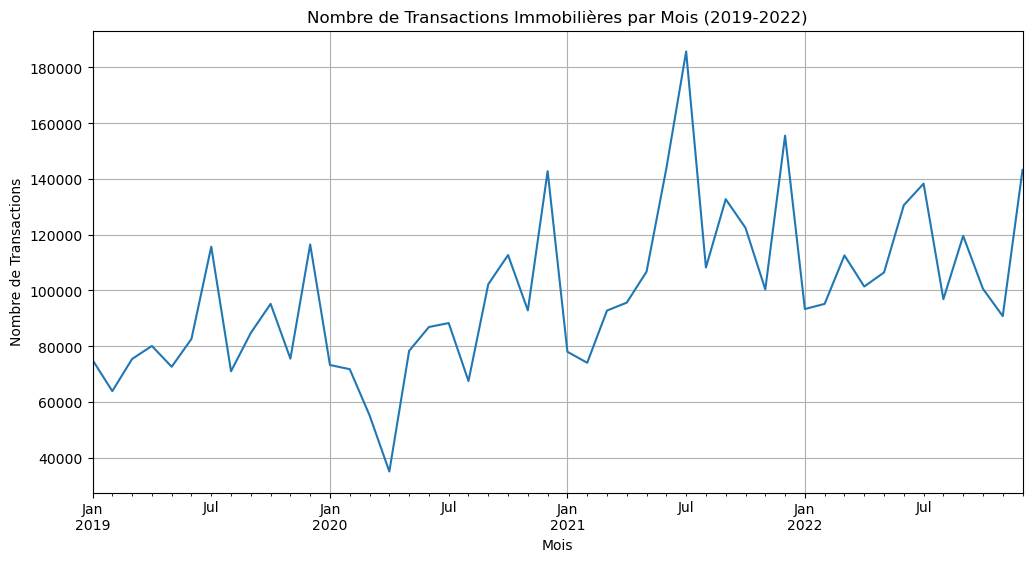

In [93]:
transactions_par_mois.plot(kind='line', figsize=(12, 6))
plt.title('Nombre de Transactions Immobilières par Mois (2019-2022)')
plt.xlabel('Mois')
plt.ylabel('Nombre de Transactions')
plt.grid(True)
plt.show()

In [94]:
data_inflation = pd.read_excel('chiffre inflation.xlsx')
data_inflation.head()

,Date,Inflation
0,2019-01-01,1.2
1,2019-02-01,1.3
2,2019-03-01,1.1
3,2019-04-01,1.3
4,2019-05-01,0.9


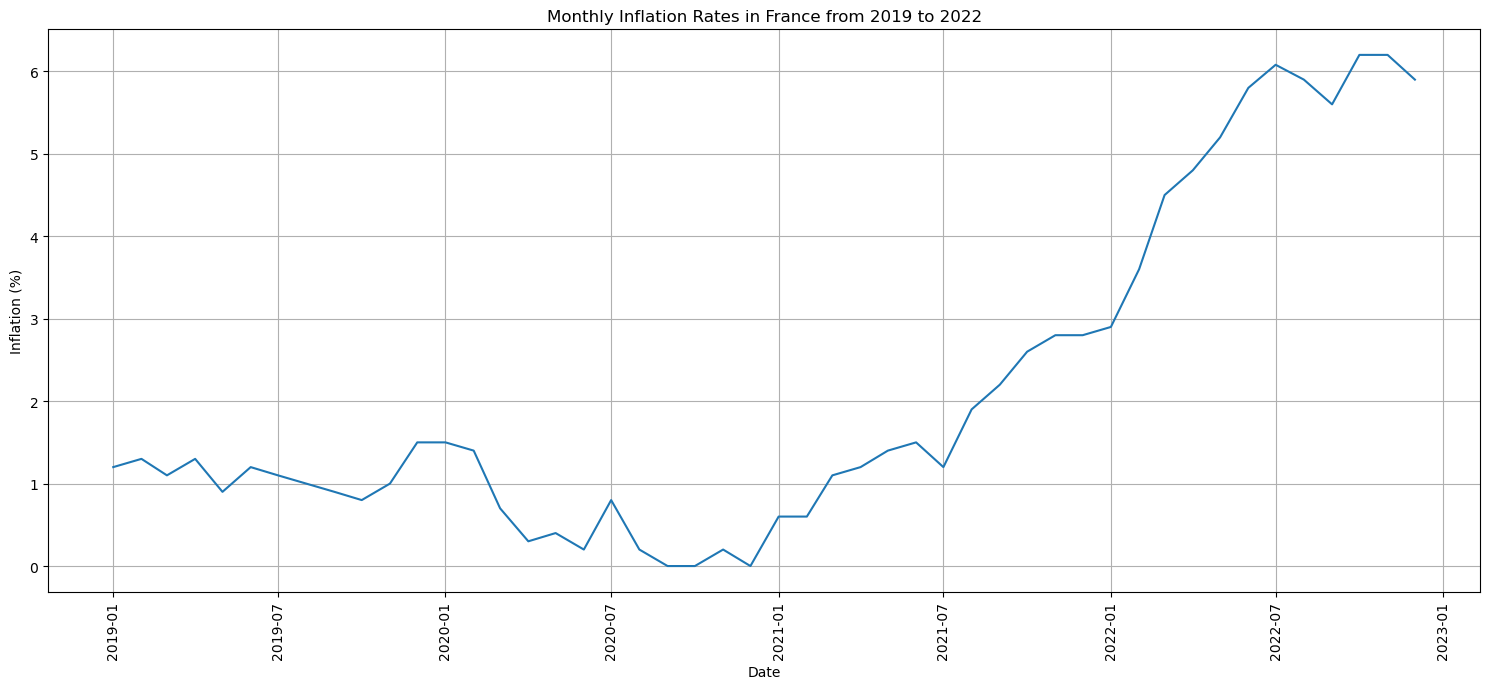

In [95]:
plt.figure(figsize=(15, 7))
plt.plot(data_inflation['Date'], data_inflation['Inflation'])
plt.xticks(rotation=90)  
plt.xlabel('Date')
plt.ylabel('Inflation (%)')
plt.title('Monthly Inflation Rates in France from 2019 to 2022')
plt.grid(True)
plt.tight_layout()  
plt.show()

In [96]:
transactions_par_mois_df = transactions_par_mois.reset_index()
transactions_par_mois_df.columns = ['Date', 'Nombre de transactions']
transactions_par_mois_df.head()
print(type(transactions_par_mois))

<class 'pandas.core.series.Series'>


In [97]:
transactions_par_mois_df['Date'] = transactions_par_mois_df['Date'].dt.to_timestamp()
transactions_par_mois_df['Date'] = pd.to_datetime(transactions_par_mois_df['Date'])
data_inflation['Date'] = pd.to_datetime(data_inflation['Date'])
merged_data = pd.merge(data_inflation, transactions_par_mois_df, on='Date')
correla = merged_data['Nombre de transactions'].corr(merged_data['Inflation'])
print("Le coefficient de corrélation de Pearson est :", correla)

Le coefficient de corrélation de Pearson est : 0.3629717444869456


In [98]:
all_data['Valeur fonciere'] = all_data['Valeur fonciere'].replace(',', '.', regex=True).astype(float)
valeur_fonciere_moyenne_par_mois = all_data.groupby('Mois')['Valeur fonciere'].mean().reset_index()
valeur_fonciere_moyenne_par_mois.columns = ['Date', 'Valeur Fonciere Moyenne']
print(valeur_fonciere_moyenne_par_mois)

       Date  Valeur Fonciere Moyenne
0   2019-01             7.626923e+06
1   2019-02             6.911826e+05
2   2019-03             1.590842e+06
3   2019-04             5.033848e+06
4   2019-05             7.853923e+05
5   2019-06             9.007140e+05
6   2019-07             3.013030e+06
7   2019-08             3.383856e+05
8   2019-09             7.621923e+05
9   2019-10             1.814848e+06
10  2019-11             1.445875e+06
11  2019-12             4.099763e+06
12  2020-01             9.065714e+05
13  2020-02             4.551266e+05
14  2020-03             1.648922e+06
15  2020-04             2.476157e+06
16  2020-05             4.331704e+05
17  2020-06             7.246025e+05
18  2020-07             1.566277e+06
19  2020-08             5.572505e+05
20  2020-09             4.856648e+05
21  2020-10             7.311286e+05
22  2020-11             7.943101e+05
23  2020-12             6.522509e+06
24  2021-01             5.057869e+05
25  2021-02             3.078764e+05
2

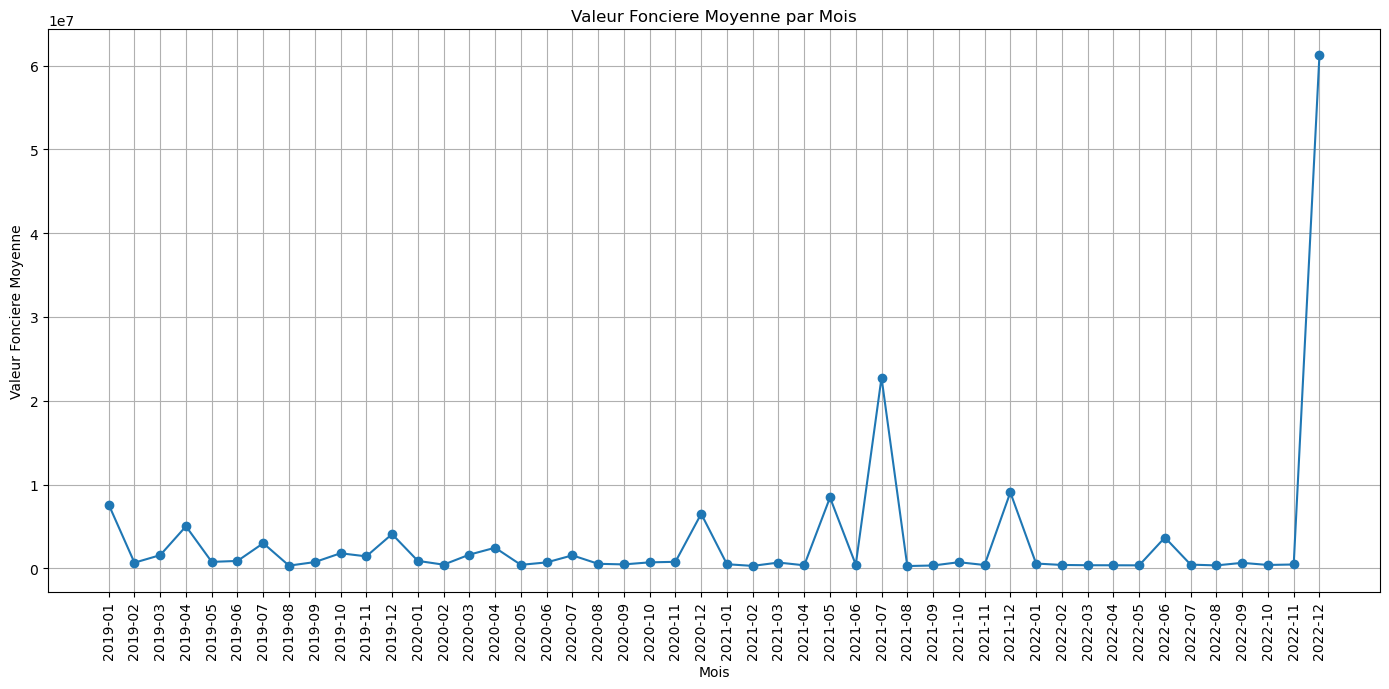

In [99]:
plt.figure(figsize=(14, 7))
plt.plot(valeur_fonciere_moyenne_par_mois['Date'].astype(str), valeur_fonciere_moyenne_par_mois['Valeur Fonciere Moyenne'], marker='o')
plt.xticks(rotation=90)
plt.xlabel('Mois')
plt.ylabel('Valeur Fonciere Moyenne')
plt.title('Valeur Fonciere Moyenne par Mois')
plt.grid(True)
plt.tight_layout()
plt.show()

In [100]:
valeur_fonciere_moyenne_par_mois['Date'] = valeur_fonciere_moyenne_par_mois['Date'].dt.to_timestamp()
valeur_fonciere_moyenne_par_mois['Date'] = pd.to_datetime(valeur_fonciere_moyenne_par_mois['Date'])
merged_data2 = pd.merge(data_inflation, valeur_fonciere_moyenne_par_mois, on='Date')
correlation2 = merged_data2['Inflation'].corr(merged_data2['Valeur Fonciere Moyenne'])
print("Le coefficient de corrélation de Pearson est :", correlation2)

Le coefficient de corrélation de Pearson est : 0.20552202916637816


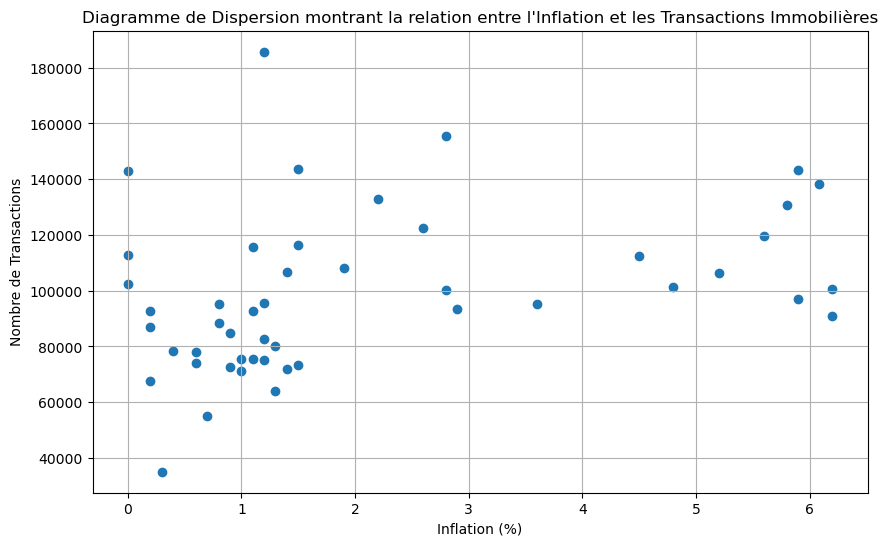

In [101]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Inflation'], merged_data['Nombre de transactions'])
plt.xlabel('Inflation (%)')
plt.ylabel('Nombre de Transactions')
plt.title('Diagramme de Dispersion montrant la relation entre l\'Inflation et les Transactions Immobilières')
plt.grid(True)
plt.show()

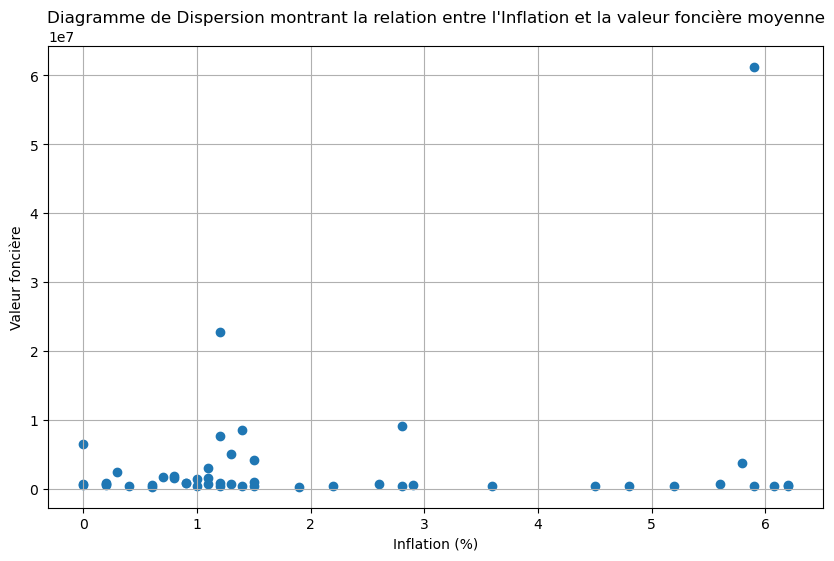

In [102]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_data2['Inflation'], merged_data2['Valeur Fonciere Moyenne'])
plt.xlabel('Inflation (%)')
plt.ylabel('Valeur foncière')
plt.title('Diagramme de Dispersion montrant la relation entre l\'Inflation et la valeur foncière moyenne')
plt.grid(True)
plt.show()

In [103]:
habitant = pd.read_excel('Dep.xlsx')
habitant.head()

,Département,Habitants
0,59,2 607 746
1,75,2 145 906
2,13,2 048 070
3,69,1 883 437
4,93,1 655 422


In [104]:
transactionTopFive=all_data.groupby("Code departement")["Code departement"].count().sort_values(ascending=False)

In [105]:
transactions_par_dep = transactionTopFive.to_frame(name='Nombre de transactions')
transactions_par_dep.reset_index(inplace=True)
transactions_par_dep.columns = ['Département', 'Nombre de transactions']
print(transactions_par_dep)
print(type(transactions_par_dep))

   Département  Nombre de transactions
0           59                  212273
1           33                  128673
2           83                  126971
3           62                  121209
4           76                  109733
..         ...                     ...
94          2B                    5770
95         972                    5268
96         971                    4968
97          90                    3331
98         973                    2832

[99 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>


In [106]:
merged_data3 = transactions_par_dep.merge(habitant, on='Département', how='inner')
merged_data3['Habitants'] = merged_data3['Habitants'].str.replace(',', '', regex=True).str.replace(' ', '', regex=True).astype(int)
print(merged_data3.dtypes)

Département               object
Nombre de transactions     int64
Habitants                  int32
dtype: object


In [107]:
co = merged_data3['Nombre de transactions'].corr(merged_data3['Habitants'])
co

0.6218162428150197

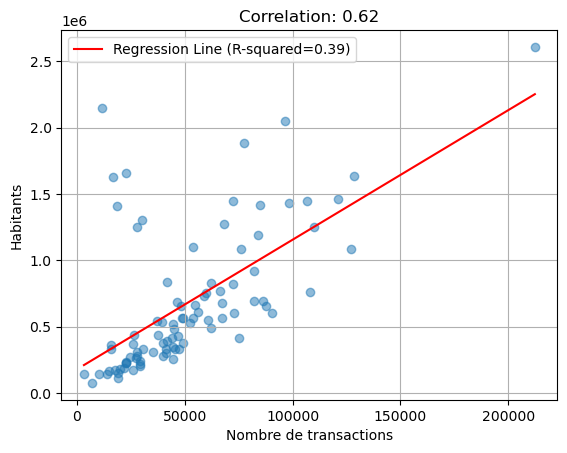

In [108]:
from scipy import stats

x = merged_data3['Nombre de transactions']
y = merged_data3['Habitants']

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept

plt.scatter(x, y, alpha=0.5)
plt.plot(x, line, color='red', label=f'Regression Line (R-squared={r_value**2:.2f})')
plt.title(f'Correlation: {co:.2f}')
plt.xlabel('Nombre de transactions')
plt.ylabel('Habitants')
plt.grid(True)
plt.legend()
plt.show()